In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from io import StringIO
import csv
import pandas as pd
from itertools import product
import seaborn as sns
import numpy as np

D:\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [1]:
import time
from get_gecko_driver import GetGeckoDriver
from selenium import webdriver

# Install the driver:
# Downloads the latest GeckoDriver version
# Adds the downloaded GeckoDriver to path
get_driver = GetGeckoDriver()
get_driver.install()

# Use the installed GeckoDriver with Selenium
driver = webdriver.Firefox()
driver.get("https://google.com")
time.sleep(3)
driver.quit()

In [ ]:
#https://towardsdatascience.com/using-machine-learning-to-simulate-world-cup-matches-959e24d0731
#https://github.com/gbarbalinardo/worldcup-simulator
#https://doctorfrequentist.medium.com/a-monte-carlo-command-line-football-soccer-simulator-that-uses-numpy-pandas-and-fivethirtyeight-fb539a2f086a
#http://rstudio-pubs-static.s3.amazonaws.com/396064_2aa20de5ddfc475b998876fd85a46dbb.html
#https://github.com/abhinavr2121/World_Cup_2022

##Fantasy league
#https://youtu.be/LzEuweGrHvc
    

In [11]:
page = urlopen("https://www.fifa.com/fifa-world-ranking/men?dateId=id13792")
soup = BeautifulSoup(page, 'html.parser')

In [15]:
soup.find('div')

<div data-reactroot="" id="__next"><button aria-label="Scroll to top" class="fc-scroll-to-top_scrollTop__dJT1G" style="display:none" type="button"><i>^</i></button></div>

In [ ]:
page = urlopen("https://www.fifa.com/fifa-world-ranking/men?dateId=id13792")
soup = BeautifulSoup(page, 'html.parser')

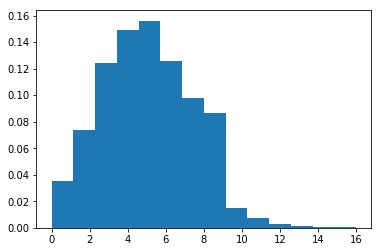

In [10]:
#A Mathematician's Guide to the World Cup
#Loi de Poisson :
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

In [ ]:
##XG : https://footystats.org/international/international-friendlies/xg
##https://allaboutfpl.com/2022/11/world-cup-2022-expected-goals-xg-group-wise-for-all-teams/


In [ ]:
##Methodo : Train model regression XG difference vs Elo Ranking difference (elastic search)
#predict difference in XG (mean,variance) : residus normal -> Home XG - Away XG vs Home Elo vs Away Elo
#sample this for predicting XG difference for a match
# Ajuster teams predicted XG values pour que la difference = difference predite
#simuler deux distributions de poissons pour simuler score ->proba de gagner via Monte Carlo

#FCH Factor XG = Predicted XG * FCH

In [11]:
# nombre de goals = Loi de Poisson (car prend des valeurs entières) dont l'esperance est un nombre de XG donné à priori
xG_Qatar = 1.69 #moyenne buts sur N derniers matchs
xG_Equateur = 1.4#moyenne buts sur N derniers matchs

def simule_match(XG_list):
    """
    
    """
    return [np.random.poisson(xg) for xg in XG_list]


simule_match([xG_Qatar, xG_Equateur])

[2, 1]

In [5]:
def simule_matchs(XG_list,N):
    return [simule_match(XG_list) for i in range(N)]
simule_matchs([xG_Qatar, xG_Equateur],1000)

[[2, 0],
 [1, 1],
 [0, 3],
 [2, 1],
 [2, 0],
 [1, 0],
 [1, 0],
 [3, 2],
 [3, 0],
 [4, 0],
 [4, 0],
 [2, 1],
 [3, 1],
 [2, 5],
 [2, 0],
 [1, 2],
 [1, 1],
 [2, 0],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [0, 1],
 [2, 0],
 [4, 3],
 [1, 2],
 [2, 0],
 [1, 1],
 [1, 1],
 [2, 0],
 [4, 4],
 [1, 0],
 [0, 3],
 [1, 1],
 [2, 0],
 [1, 2],
 [0, 1],
 [2, 2],
 [3, 3],
 [3, 1],
 [1, 0],
 [0, 0],
 [1, 0],
 [3, 1],
 [2, 0],
 [1, 3],
 [4, 3],
 [0, 0],
 [1, 1],
 [2, 1],
 [3, 1],
 [1, 2],
 [1, 3],
 [4, 3],
 [1, 0],
 [1, 2],
 [3, 5],
 [3, 2],
 [1, 1],
 [1, 2],
 [2, 0],
 [0, 1],
 [3, 1],
 [2, 0],
 [1, 2],
 [2, 1],
 [1, 1],
 [3, 3],
 [3, 2],
 [0, 1],
 [2, 3],
 [3, 0],
 [1, 0],
 [5, 4],
 [3, 2],
 [0, 2],
 [1, 2],
 [2, 1],
 [2, 1],
 [1, 0],
 [2, 3],
 [3, 0],
 [0, 2],
 [2, 1],
 [5, 0],
 [1, 0],
 [2, 0],
 [1, 0],
 [0, 1],
 [2, 2],
 [2, 0],
 [2, 2],
 [3, 0],
 [1, 0],
 [1, 0],
 [1, 1],
 [2, 3],
 [0, 2],
 [1, 2],
 [3, 1],
 [1, 1],
 [2, 0],
 [0, 0],
 [1, 1],
 [2, 0],
 [1, 2],
 [1, 2],
 [0, 0],
 [1, 0],
 [1, 1],
 [2, 1],
 

In [11]:
def vainqueur_match(XG_list,N):
    simulations_match = simule_matchs(XG_list,N)
    return int( np.mean([x[0] for x in simulations_match]) < np.mean([x[1] for x in simulations_match])  )
vainqueur_match([58, 0],1)

0

In [14]:
int(0 <58)

1

In [15]:
int(0>58)

0

In [17]:
vainqueur_match([xG_Qatar, xG_Equateur],1000)

0

In [13]:
elo_qatar = 1680
elo_equator = 1833


In [5]:
1.16/1.69

0.6863905325443787

In [6]:
1.57/1.4

1.1214285714285714

In [35]:
xG_Qatar*(elo_qatar-elo_equator)/(elo_equator+elo_qatar)

-0.07360375747224594

In [36]:
xG_Equateur*(elo_equator-elo_qatar)/(elo_equator+elo_qatar)

0.060973526900085395

In [44]:
from bs4 import BeautifulSoup
page = urlopen("http://www.eloratings.net/2022_World_Cup_start")
soup = BeautifulSoup(page, 'html.parser')
#print(soup.prettify())

In [66]:

r = requests.get("http://www.eloratings.net/2022_World_Cup_start", verify=False)
r.text

'<!DOCTYPE html>\n<html lang="en"><head><title>World Football Elo Ratings</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n<meta name="description" content="Ratings for national football teams based on the Elo rating system.">\n<meta name="keywords" content="football, ratings, Elo, rankings, national, international, soccer, teams">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no">\n<link rel="stylesheet" href="scripts/slick.grid.css" type="text/css"/>\n<link rel="stylesheet" href="scripts/dygraph.css" type="text/css"/>\n<script type="text/javascript" src="scripts/dygraph.js"></script>\n<script type="text/javascript" src="scripts/jquery.js"></script>\n<script type="text/javascript" src="scripts/slick.core.js"></script>\n<script type="text/javascript" src="scripts/slick.grid.js"></script>\n<script type="text/javascript" src="scripts/cldr.js"></script>\n<script type="text/javascript

In [52]:
from bs4 import BeautifulSoup
page = urlopen("https://www.eloratings.net/")
soup = BeautifulSoup(page, 'html.parser')
soup.body

<body>
<div class="main" id="main">
<h1 class="mainheader" id="mainheader"></h1>
<div class="topnav" id="topnav"></div>
<h3 class="subheader" id="subheader"></h3>
<div class="maindiv" id="maindiv"></div>
</div>
<div class="mainmenu" id="mainmenu"></div>
<div class="mainloader">
<div class="loadheader" id="loadheader">World Football Elo Ratings</div>
</div>
</body>

In [61]:
soup.find_all('h3')

[<h3 class="subheader" id="subheader"></h3>]

In [64]:
soup.find_all('tbody')

[]

In [49]:
import requests

url = "http://www.eloratings.net/2022_World_Cup_start"
doc = requests.get(url)
#root = lxml.html.fromstring(doc.text)

In [39]:
soup.div

<div class="main" id="main">
<h1 class="mainheader" id="mainheader"></h1>
<div class="topnav" id="topnav"></div>
<h3 class="subheader" id="subheader"></h3>
<div class="maindiv" id="maindiv"></div>
</div>

In [ ]:
<div class="ui-widget-content slick-row even" style="top:64px"><div class="slick-cell l0 r0 local-cell ">3</div><div class="slick-cell l1 r1 global-cell ">3</div><div class="slick-cell l2 r2 team-cell "><a href="Spain" onclick="handleLink('Spain'); return false;">Spain</a></div><div class="slick-cell l3 r3 rating-cell ">2048</div><div class="slick-cell l4 r4 rating-cell ">7</div><div class="slick-cell l5 r5 rating-cell ">1941</div><div class="slick-cell l6 r6 rating-cell ">+2</div><div class="slick-cell l7 r7 rating-cell ">+11</div><div class="slick-cell l8 r8 rating-cell ">737</div><div class="slick-cell l9 r9 rating-cell ">324</div><div class="slick-cell l10 r10 rating-cell ">290</div><div class="slick-cell l11 r11 rating-cell ">123</div><div class="slick-cell l12 r12 rating-cell ">431</div><div class="slick-cell l13 r13 rating-cell ">135</div><div class="slick-cell l14 r14 rating-cell ">171</div>
<div class="slick-cell l15 r15 rating-cell ">1478</div><div class="slick-cell l16 r16 rating-cell ">662</div></div>

In [37]:
soup.text

'\nWorld Football Elo Ratings\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWorld Football Elo\xa0Ratings\n\n\n\n'

In [59]:
soup.find('div',{'class':"ui-widget-content slick-row even" })

In [3]:
from selenium import webdriver

In [2]:
from selenium import webdriver
driver = webdriver.Firefox()

driver.get("http://www.eloratings.net/2022_World_Cup_start")
#time.sleep(5)
htmlSource = driver.page_source

In [3]:
htmlSource

'<html lang="en"><head><title>World Football Elo Ratings</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="description" content="Ratings for national football teams based on the Elo rating system.">\n<meta name="keywords" content="football, ratings, Elo, rankings, national, international, soccer, teams">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no">\n<link rel="stylesheet" href="scripts/slick.grid.css" type="text/css">\n<link rel="stylesheet" href="scripts/dygraph.css" type="text/css">\n<script type="text/javascript" src="scripts/dygraph.js"></script>\n<script type="text/javascript" src="scripts/jquery.js"></script>\n<script type="text/javascript" src="scripts/slick.core.js"></script>\n<script type="text/javascript" src="scripts/slick.grid.js"></script>\n<script type="text/javascript" src="scripts/cldr.js"></script>\n<script type="text/javascript" src="scripts/event

In [8]:
soup = BeautifulSoup(htmlSource)
soup

<html lang="en"><head><title>World Football Elo Ratings</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Ratings for national football teams based on the Elo rating system." name="description"/>
<meta content="football, ratings, Elo, rankings, national, international, soccer, teams" name="keywords"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<link href="scripts/slick.grid.css" rel="stylesheet" type="text/css"/>
<link href="scripts/dygraph.css" rel="stylesheet" type="text/css"/>
<script src="scripts/dygraph.js" type="text/javascript"></script>
<script src="scripts/jquery.js" type="text/javascript"></script>
<script src="scripts/slick.core.js" type="text/javascript"></script>
<script src="scripts/slick.grid.js" type="text/javascript"></script>
<script src="scripts/cldr.js" type="text/javascript"></script>
<script src="scripts/event.js" type="text/javascript"></

In [5]:
driver

<selenium.webdriver.firefox.webdriver.WebDriver (session="47eefa4b-5ebb-40bc-b520-39b1c0878c57")>

In [ ]:
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary

binary = FirefoxBinary('path/to/installed firefox binary')
browser = webdriver.Firefox(firefox_binary=binary)

In [2]:
driver = webdriver.PhantomJS()
driver.get("http://www.eloratings.net/2022_World_Cup_start")
p_element = driver.find_element_by_id(id_='intro-text')
print(p_element.text)

AttributeError: module 'selenium.webdriver' has no attribute 'PhantomJS'

In [3]:
from selenium import webdriver
setx path "%path%;D:\Users\Robin_user\Documents\Monte_Carlo_Simulator"
browser = webdriver.Firefox()
browser.get('http://selenium.dev/')

SyntaxError: invalid syntax (<ipython-input-3-2aa397a97380>, line 2)

In [9]:
import requests
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

# We don't want to open the webpage in a real browser, but in a headless browser.
options = Options()
options.add_argument('--headless')
driver = webdriver.Firefox(options=options)

# Now we use the driver to render the JavaScript webpage.
driver.get("http://quotes.toscrape.com/js/")
# page_source stores the HTML markup of the webpage, not the JavaScript code.
page_source = driver.page_source


In [10]:
soup = BeautifulSoup(page_source )
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<script src="/static/jquery.js"></script>
<script>
    var data = [
    {
        "tags": [
            "change",
            "deep-thoughts",
            "thinking",
            "world"
        ],
        "author": {
            "name": "Albert Einstein",
            "goodreads_link": "/author/show/9810.Albert_Einstein",
            "slug": "Albert-Einstein"
        },
        "text": "\u201cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\u201d"
    },
    {
        "tags": [
            "abilitie

In [13]:
driver.get("http://www.eloratings.net/2022_World_Cup_start/ratings.js/")
# page_source stores the HTML markup of the webpage, not the JavaScript code.
page_source = driver.page_source

In [14]:
driver.page_source

'<html style="height:100%"><head>\n<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n<title> 404 Not Found\n</title></head>\n<body style="color: #444; margin:0;font: normal 14px/20px Arial, Helvetica, sans-serif; height:100%; background-color: #fff;">\n<div style="height:auto; min-height:100%; ">     <div style="text-align: center; width:800px; margin-left: -400px; position:absolute; top: 30%; left:50%;">\n        <h1 style="margin:0; font-size:150px; line-height:150px; font-weight:bold;">404</h1>\n<h2 style="margin-top:20px;font-size: 30px;">Not Found\n</h2>\n<p>The resource requested could not be found on this server!</p>\n</div></div><div style="color:#f0f0f0; font-size:12px;margin:auto;padding:0px 30px 0px 30px;position:relative;clear:both;height:100px;margin-top:-101px;background-color:#474747;border-top: 1px solid rgba(0,0,0,0.15);box-shadow: 0 1px 0 rgba(255, 255, 255, 0.3) inset;">\n<br>Proudly powered by  <a style="color:#fff;" href="http:

In [15]:
import requests
url ="http://www.eloratings.net/2022_World_Cup_start.tsv?_=1669842790390"
r = requests.get(url)

In [18]:
print(r.text)

1	1	BR	2169	1	2193	4	1999	20	1813	0	+3	0	+14	0	+20	0	+33	0	+56	+1	+95	1026	364	331	331	654	161	211	2230	912
2	2	AR	2143	1	2158	5	1984	26	1752	0	+4	+1	+35	+1	+42	+6	+152	+4	+159	+2	+143	1061	368	405	288	573	225	263	2001	1107
3	3	ES	2048	1	2165	7	1941	19	1804	0	â4	+2	+9	+2	+11	+1	â2	0	+17	â2	â102	737	324	290	123	431	135	171	1478	662
4	4	NL	2040	1	2154	15	1844	54	1551	+2	+37	+6	+102	+8	+111	+3	+46	+7	+145	+1	+43	853	405	345	103	438	230	185	1774	1090
5	5	BE	2007	1	2158	23	1751	71	1503	â1	â27	â1	â62	â1	â68	â3	â104	+3	+79	+17	+221	834	401	358	75	369	294	171	1515	1323
6	6	PT	2006	2	2061	19	1789	41	1621	+1	+6	+2	+21	+2	+33	â1	â33	â2	+12	+4	+103	651	304	246	101	317	182	152	1112	742
7	7	FR	2005	1	2135	16	1784	41	1505	â2	â23	â5	â112	â5	â110	â4	â88	â2	+16	+5	+116	890	455	330	105	441	262	187	1589	1239
8	9	DK	1971	1	2076	20	1798	61	1537	0	+10	+2	+35	+1	+34	+4	+44	+9	+129	+15	+195	864	393	383	88	401	288	175	1590	1177
9	10	DE	1963	1	2223	8	1910	24	1639	â

In [38]:
import re
regex = re.compile('[a-zA-Z]{2}')
regex.findall(r.text)

['BR',
 'AR',
 'ES',
 'NL',
 'BE',
 'PT',
 'FR',
 'DK',
 'DE',
 'UY',
 'HR',
 'EN',
 'CH',
 'RS',
 'EC',
 'PL',
 'MX',
 'US',
 'IR',
 'WA',
 'JP',
 'KR',
 'CA',
 'MA',
 'CR',
 'AU',
 'TN',
 'SN',
 'QA',
 'SA',
 'CM',
 'GH']

In [29]:
import pandas as pd
import numpy as np
#http://www.eloratings.net/2022_World_Cup_start.tsv?_=1669844308850
df =pd.read_csv("http://www.eloratings.net/2022_World_Cup_start.tsv?_=1669842790390",sep='\t',header=None)

In [64]:
r_label = requests.get('http://www.eloratings.net/en.labels.tsv?_=1669844308847')
r_find_words = re.compile('[a-zA-Z]{1,}')
r_find_words.findall(r_label.text)

['dateHeader',
 'Date',
 'matchHeader',
 'Match',
 'fixtureHeader',
 'Match',
 'tournamentHeader',
 'Tournament',
 'changesHeader',
 'Rating',
 'movesHeader',
 'Rank',
 'ranksMenuLabel',
 'Rank',
 'rankHeader',
 'Rank',
 'currentHeader',
 'Current',
 'currentMenuLabel',
 'Current',
 'Rank',
 'Rating',
 'winexpHeader',
 'Winning',
 'Expectancy',
 'Winning',
 'Exptcy',
 'Win',
 'Exptcy',
 'Win',
 'Exp',
 'WE',
 'estimateHeader',
 'Points',
 'Exchanged',
 'drawHeader',
 'Draw',
 'Draw',
 'Draw',
 'Draw',
 'D',
 'change',
 'Header',
 'Win',
 'By',
 'Win',
 'Win',
 'W',
 'W',
 'change',
 'Header',
 'Win',
 'By',
 'Win',
 'Win',
 'W',
 'W',
 'change',
 'Header',
 'Win',
 'By',
 'Win',
 'Win',
 'W',
 'W',
 'change',
 'Header',
 'Win',
 'By',
 'Win',
 'Win',
 'W',
 'W',
 'change',
 'Header',
 'Win',
 'By',
 'Win',
 'Win',
 'W',
 'W',
 'localHeader',
 'Local',
 'L',
 'globalHeader',
 'Global',
 'G',
 'teamHeader',
 'Team',
 'ratingHeader',
 'Rating',
 'R',
 'changeHeader',
 'Change',
 'changeMe

In [69]:

f = StringIO(r_label.text)
reader = csv.reader(f, delimiter='\\')
for row in reader:
    print('\t'.join(row))

dateHeader	Date
matchHeader	Match
fixtureHeader	Match
tournamentHeader	Tournament
changesHeader	Rating
movesHeader	Rank
ranksMenuLabel	Rank
rankHeader	Rank	#
currentHeader	Current
currentMenuLabel	Current Rank / Rating
winexpHeader	Winning Expectancy	Winning Exptcy	Win Exptcy	Win Exp	WE
estimateHeader	Points Exchanged
drawHeader	Draw	Draw	Draw	Draw	D
change1Header	Win By 1	Win Ã 1	WinÃ1	W Ã 1	WÃ1
change2Header	Win By 2	Win Ã 2	WinÃ2	W Ã 2	WÃ2
change3Header	Win By 3	Win Ã 3	WinÃ3	W Ã 3	WÃ3
change4Header	Win By 4	Win Ã 4	WinÃ4	W Ã 4	WÃ4
change5Header	Win By 5	Win Ã 5	WinÃ5	W Ã 5	WÃ5
localHeader	Local	L
globalHeader	Global	G
teamHeader	Team
ratingHeader	Rating	R
changeHeader	Change
changeMenuLabel	Change in Rank / Rating
highestHeader	Highest
highestMenuLabel	Highest Rank / Rating
averageHeader	Average
averageMenuLabel	Average Rank / Rating
lowestHeader	Lowest
lowestMenuLabel	Lowest Rank / Rating
change3mHeader	Three Month Change	3 Month Change	3 Month Î	3M Î
change6

In [91]:
#nom des equipes : http://www.eloratings.net/en.teams.tsv?_=1669844308848
r_teams = requests.get('http://www.eloratings.net/en.teams.tsv?_=1669844308848')
df = pd.read_csv(StringIO(r_teams.text), sep="\\")
df.head()

,DN\tAden
0,AF\tAfghanistan
1,AL\tAlbania
2,DZ\tAlgeria
3,AD\tAndorra
4,AO\tAngola


In [128]:
f = StringIO(r_teams.text)
reader = csv.reader(f, delimiter='\\')
l =[]
for row in reader:
    l.append(row[0].split('\t',1))
   # print(type(row[0]))
#['\t'.join(row) for row in reader]
#print([row[0].split('\t',1) for row in reader])
#a,b = s.split(' ', 1)
#row[0].split('\t',1)
pd.DataFrame(l,columns=['Team','Team_Name'])

,Team,Team_Name
0,DN,Aden
1,AF,Afghanistan
2,AL,Albania
3,DZ,Algeria
4,AD,Andorra
...,...,...
316,YU,Yugoslavia
317,ZR,Zaire
318,ZM,Zambia
319,ZN,Zanzibar


In [106]:
reader

In [ ]:
columns_name =['Rank_Global' ,'Rank_Team','Team','Rating', 'Average_Rank','Average_Rating', '1 Year Change Rank','1 Year Change Rating',
'Total','Home','Away','Neutral','Wins','Losses','Draws','Goals_For','Goals_Against']
df.loc[:,[0,1,2,3,6,7,14,8]+[22+i for i in range(9)]].head()


df_elo = pd.DataFrame(data = df.loc[:,[0,1,2,3,6,7,14,8]+[22+i for i in range(9)]] )
df_elo.columns = columns_name
df_elo.head()
#len(df_elo.columns),len(columns_name)

In [9]:

#on va scrapper les données
request =pd.read_csv("http://www.eloratings.net/2022_World_Cup_start.tsv?_=1669842790390",sep='\t',header=None)
request_teams = requests.get('http://www.eloratings.net/en.teams.tsv?_=1669844308848')

f = StringIO(request_teams.text)
reader = csv.reader(f, delimiter='\\')
l_teams =[]
for row in reader:
    l_teams.append(row[0].split('\t',1))

df_teams = pd.DataFrame(l_teams,columns=['Team','Team_Name'])

columns_names =['Rank_Global' ,'Rank_Team','Team','Rating', 'Average_Rank','Average_Rating', '1 Year Change Rank','1 Year Change Rating',
'Total','Home','Away','Neutral','Wins','Losses','Draws','Goals_For','Goals_Against']

df_elo = pd.DataFrame(data =request .loc[:,[0,1,2,3,6,7,14,8]+[22+i for i in range(9)]] )
df_elo.columns = columns_names
df_elo = df_elo.merge(df_teams,how='left',on='Team')
df_elo=df_elo.reindex(columns=list(df_elo.columns[0:3])+[df_elo.columns[-1]]+list(df_elo.columns[3:-1]))
df_elo.head()


,Rank_Global,Rank_Team,Team,Team_Name,Rating,Average_Rank,Average_Rating,1 Year Change Rank,1 Year Change Rating,Total,Home,Away,Neutral,Wins,Losses,Draws,Goals_For,Goals_Against
0,1,1,BR,Brazil,2169,4,1999,0,20,1026,364,331,331,654,161,211,2230,912
1,2,2,AR,Argentina,2143,5,1984,+1,26,1061,368,405,288,573,225,263,2001,1107
2,3,3,ES,Spain,2048,7,1941,+2,19,737,324,290,123,431,135,171,1478,662
3,4,4,NL,Netherlands,2040,15,1844,+8,54,853,405,345,103,438,230,185,1774,1090
4,5,5,BE,Belgium,2007,23,1751,−1,71,834,401,358,75,369,294,171,1515,1323


In [6]:
df_elo.to_csv("elo_ratings_team.csv", sep='\t')

In [ ]:
#Sources :https://www.youtube.com/watch?v=qxj7EXYeNls
#https://youtu.be/KjISuZ5o06Q

In [ ]:
#https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017

In [ ]:
#idee calculer XGA vs XG equipe vs equipe?

In [26]:
df_goalscorers = pd.read_csv("goalscorers.csv")
df_goalscorers.tail()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
10850,2022-11-30,Poland,Argentina,Argentina,Julián Álvarez,67.0,False,False
10851,2022-11-30,Saudi Arabia,Mexico,Mexico,Henry Martín,47.0,False,False
10852,2022-11-30,Saudi Arabia,Mexico,Mexico,Luis Chávez,52.0,False,False
10853,2022-11-30,Saudi Arabia,Mexico,Saudi Arabia,Salem Al-Dawsari,90.0,False,False
10854,2022-11-30,Tunisia,France,Tunisia,Wahbi Khazri,58.0,False,False


In [27]:
df_goalscorers['goal'] = 1 -df_goalscorers['own_goal'].astype(int)
df_goalscorers

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,goal
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1
...,...,...,...,...,...,...,...,...,...
10850,2022-11-30,Poland,Argentina,Argentina,Julián Álvarez,67.0,False,False,1
10851,2022-11-30,Saudi Arabia,Mexico,Mexico,Henry Martín,47.0,False,False,1
10852,2022-11-30,Saudi Arabia,Mexico,Mexico,Luis Chávez,52.0,False,False,1
10853,2022-11-30,Saudi Arabia,Mexico,Saudi Arabia,Salem Al-Dawsari,90.0,False,False,1


In [2]:
df_results = pd.read_csv("results.csv")
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [30]:
df_results['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [42]:
df_results[['home_team','home_score']].rename({'home_team':'team','home_score':'score'})

,home_team,home_score
0,Scotland,0.0
1,England,4.0
2,Scotland,2.0
3,England,2.0
4,Scotland,3.0
...,...,...
44201,Canada,NaN
44202,Serbia,NaN
44203,Cameroon,NaN
44204,Ghana,NaN


In [69]:
#filtre date
df_results2 =df_results[(df_results['date']>='2018')&(df_results['date']<"2022-11-20")]
#filtre tournois
    
df1 = df_results2[['home_team','home_score']]
df1 = df1.rename(columns={'home_team':'team','home_score':'score'})
df2 = df_results2[['away_team','away_score']]
df2= df2.rename(columns={'away_team':'team','away_score':'score'})

df_xg1 = pd.concat([df1,df2],axis=0)
df_xg1 =df_xg1.reset_index(drop=True)
df_xg1.isna().sum()
#drop na
df_xg1 = df_xg1.dropna()
#ou fillna(0)
df_xg1.isna().sum()
df_extract = df_xg1.groupby('team').agg(score = ('score','mean'),
                                         nb_match= ('score','count'))
df_extract 

,score,nb_match
team,,
Abkhazia,1.909091,11
Afghanistan,0.947368,19
Albania,1.040816,49
Alderney,1.666667,3
Algeria,1.966102,59
...,...,...
Ynys Môn,2.833333,6
Yorkshire,3.857143,7
Yoruba Nation,0.500000,2


In [71]:
df_elo =df_elo.merge(df_extract ,how='left',left_on='Team_Name',right_on='team')

In [72]:
df_elo.head()

,Rank_Global,Rank_Team,Team,Team_Name,Rating,Average_Rank,Average_Rating,1 Year Change Rank,1 Year Change Rating,Total,Home,Away,Neutral,Wins,Losses,Draws,Goals_For,Goals_Against,score,nb_match
0,1,1,BR,Brazil,2169,4,1999,0,20,1026,364,331,331,654,161,211,2230,912,2.169492,59.0
1,2,2,AR,Argentina,2143,5,1984,+1,26,1061,368,405,288,573,225,263,2001,1107,1.947368,57.0
2,3,3,ES,Spain,2048,7,1941,+2,19,737,324,290,123,431,135,171,1478,662,2.220339,59.0
3,4,4,NL,Netherlands,2040,15,1844,+8,54,853,405,345,103,438,230,185,1774,1090,2.230769,52.0
4,5,5,BE,Belgium,2007,23,1751,−1,71,834,401,358,75,369,294,171,1515,1323,2.557377,61.0


In [86]:
df_elo['Team_Name'].merge(df_elo[['Team_Name']], on=['Team_Name','Team_Name']).query('Team_Name != Team_Name')

,Team_Name


In [95]:
from itertools import product

df_couples = pd.DataFrame(list(product(df_elo['Team_Name'], df_elo['Team_Name'])),columns=['Team_A','Team_B'])
df_couples=df_couples[df_couples['Team_A']!= df_couples['Team_B']]
df_couples = df_couples.merge(df_elo[['Rank_Team','Rating','Team_Name','score']],left_on='Team_A',right_on='Team_Name')
df_couples = df_couples.merge(df_elo[['Rank_Team','Rating','Team_Name','score']],left_on='Team_B',right_on='Team_Name',suffixes=('_A', '_B'))
#suffixes=('_x', '_y')
df_couples=df_couples.drop( columns=['Team_Name_A','Team_Name_B'])
df_couples

,Team_A,Team_B,Rank_Team_A,Rating_A,score_A,Rank_Team_B,Rating_B,score_B
0,Brazil,Argentina,1,2169,2.169492,2,2143,1.947368
1,Spain,Argentina,3,2048,2.220339,2,2143,1.947368
2,Netherlands,Argentina,4,2040,2.230769,2,2143,1.947368
3,Belgium,Argentina,5,2007,2.557377,2,2143,1.947368
4,Portugal,Argentina,6,2006,2.086207,2,2143,1.947368
...,...,...,...,...,...,...,...,...
987,Senegal,Brazil,44,1687,1.428571,1,2169,2.169492
988,Qatar,Brazil,46,1680,1.710145,1,2169,2.169492
989,Saudi Arabia,Brazil,55,1635,1.230769,1,2169,2.169492
990,Cameroon,Brazil,60,1610,1.086957,1,2169,2.169492


In [96]:
df_couples['XG_difference'] = df_couples['score_A'] - df_couples['score_B']
df_couples['Rating_difference']=df_couples['Rating_A'] - df_couples['Rating_B']
df_couples

,Team_A,Team_B,Rank_Team_A,Rating_A,score_A,Rank_Team_B,Rating_B,score_B,XG_difference,Rating_difference
0,Brazil,Argentina,1,2169,2.169492,2,2143,1.947368,0.222123,26
1,Spain,Argentina,3,2048,2.220339,2,2143,1.947368,0.272971,-95
2,Netherlands,Argentina,4,2040,2.230769,2,2143,1.947368,0.283401,-103
3,Belgium,Argentina,5,2007,2.557377,2,2143,1.947368,0.610009,-136
4,Portugal,Argentina,6,2006,2.086207,2,2143,1.947368,0.138838,-137
...,...,...,...,...,...,...,...,...,...,...
987,Senegal,Brazil,44,1687,1.428571,1,2169,2.169492,-0.740920,-482
988,Qatar,Brazil,46,1680,1.710145,1,2169,2.169492,-0.459347,-489
989,Saudi Arabia,Brazil,55,1635,1.230769,1,2169,2.169492,-0.938722,-534
990,Cameroon,Brazil,60,1610,1.086957,1,2169,2.169492,-1.082535,-559


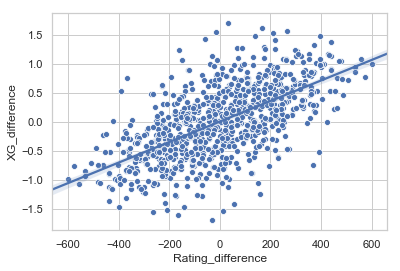

In [106]:
#ax.set_style("darkgrid")
#ax.set(style="ticks")
with sns.axes_style("whitegrid"):
    ax = sns.scatterplot(data=df_couples,x='Rating_difference',y='XG_difference')

    scatterplot=sns.regplot(data=df_couples,x='Rating_difference',y='XG_difference', scatter=False, ax=ax)
    fig = scatterplot.get_figure() 
    fig.savefig("XG_diff_vs_rating_diff.png") 

In [121]:
df_couples=df_couples.dropna(subset= ['XG_difference'], axis=0)

In [122]:
df_couples['XG_difference'].isna().sum()

0

In [126]:
from sklearn.linear_model import ElasticNet
import numpy as np
X, y = np.array(df_couples['Rating_difference']).reshape(-1, 1),np.array(df_couples['XG_difference'])                          
regr = ElasticNet(random_state=0)
regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)


[0.00175685]
0.0


In [131]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X, y = np.array(df_couples['Rating_difference']).reshape(-1, 1),np.array(df_couples['XG_difference'])    
reg.fit(X,y)
reg.coef_

array([0.00176751])

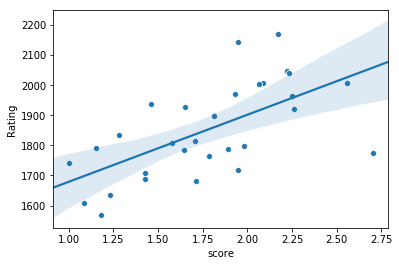

In [76]:
import seaborn as sns

ax = sns.scatterplot(data=df_elo,x='score',y='Rating');
sns.regplot(data=df_elo,x='score',y='Rating', scatter=False, ax=ax);


In [29]:
df_goalscorers.groupby('team').agg({'goal':'sum'}).sort_values('goal', ascending=False)

,goal
team,
Brazil,752
Argentina,636
Uruguay,512
Mexico,346
Chile,335
...,...
Philippines,1
Palestine,1
Latvia,1


In [19]:
df_xg_scorers =df_goalscorers[(df_goalscorers['date']>='2018')&(df_goalscorers['date']<"2022-11-20")]

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
9802,2018-06-14,Russia,Saudi Arabia,Russia,Yury Gazinsky,12.0,False,False
9803,2018-06-14,Russia,Saudi Arabia,Russia,Denis Cheryshev,43.0,False,False
9804,2018-06-14,Russia,Saudi Arabia,Russia,Artem Dzyuba,71.0,False,False
9805,2018-06-14,Russia,Saudi Arabia,Russia,Denis Cheryshev,90.0,False,False
9806,2018-06-14,Russia,Saudi Arabia,Russia,Aleksandr Golovin,90.0,False,False
...,...,...,...,...,...,...,...,...
10753,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,85.0,False,False
10754,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,87.0,False,False
10755,2022-06-01,Italy,Argentina,Argentina,Lautaro Martínez,28.0,False,False
10756,2022-06-01,Italy,Argentina,Argentina,Ángel Di María,45.0,False,False


In [2]:
#test kaggle
def init_on_kaggle(username, api_key):
    KAGGLE_CONFIG_DIR = os.path.join(os.path.expandvars('$HOME'), '.kaggle')
    os.makedirs(KAGGLE_CONFIG_DIR, exist_ok = True)
    api_dict = {"username":username, "key":api_key}
    with open(f"{KAGGLE_CONFIG_DIR}/kaggle.json", "w", encoding='utf-8') as f:
        json.dump(api_dict, f)
    cmd = f"chmod 600 {KAGGLE_CONFIG_DIR}/kaggle.json"
    output = subprocess.check_output(cmd.split(" "))
    output = output.decode(encoding='UTF-8')
    print(output)

In [ ]:
import kaggle

#The API is simplest to access via kaggle.api object. 
#I will do that for the rest of this notebook, but you could just as well assign it to something shorter if you like
#For example:

api = kaggle.api
api.get_config_value("username")

In [3]:
df_elo = pd.read_csv("elo_ratings_team.csv", sep='\t',index_col=0)
df_elo.head()

,Rank_Global,Rank_Team,Team,Team_Name,Rating,Average_Rank,Average_Rating,1 Year Change Rank,1 Year Change Rating,Total,Home,Away,Neutral,Wins,Losses,Draws,Goals_For,Goals_Against
0,1,1,BR,Brazil,2169,4,1999,0,20,1026,364,331,331,654,161,211,2230,912
1,2,2,AR,Argentina,2143,5,1984,+1,26,1061,368,405,288,573,225,263,2001,1107
2,3,3,ES,Spain,2048,7,1941,+2,19,737,324,290,123,431,135,171,1478,662
3,4,4,NL,Netherlands,2040,15,1844,+8,54,853,405,345,103,438,230,185,1774,1090
4,5,5,BE,Belgium,2007,23,1751,−1,71,834,401,358,75,369,294,171,1515,1323


In [28]:
df_results[df_results['date']>'2015'].groupby('tournament').count().sort_values(by=['date'],ascending=False).head(40).index

Index(['Friendly', 'FIFA World Cup qualification', 'UEFA Nations League',
       'UEFA Euro qualification', 'African Cup of Nations qualification',
       'CONCACAF Nations League', 'African Cup of Nations',
       'African Nations Championship', 'COSAFA Cup',
       'AFC Asian Cup qualification', 'Gold Cup', 'FIFA World Cup',
       'Copa América', 'UEFA Euro', 'AFC Asian Cup',
       'CONIFA World Football Cup', 'Island Games',
       'CONCACAF Nations League qualification',
       'African Nations Championship qualification', 'AFF Championship',
       'CONIFA European Football Cup', 'CECAFA Cup', 'EAFF Championship',
       'CFU Caribbean Cup qualification', 'SAFF Cup', 'Arab Cup', 'Gulf Cup',
       'Pacific Games', 'Kirin Challenge Cup',
       'Inter Games Football Tournament', 'Confederations Cup',
       'Oceania Nations Cup', 'Pacific Mini Games', 'Intercontinental Cup',
       'Baltic Cup', 'AFC Challenge Cup', 'King's Cup',
       'Gold Cup qualification', 'Windward Islands

In [3]:

def feature_engineering(dataframe_elo_score,dataframe_game_results,date_bounds=['2018',"2022-11-20"],
                        tournaments_list=['Friendly', 'FIFA World Cup qualification', 'UEFA Nations League',
       'UEFA Euro qualification', 'African Cup of Nations qualification',
       'CONCACAF Nations League', 'African Cup of Nations',
       'African Nations Championship', 'COSAFA Cup',
       'AFC Asian Cup qualification', 'Gold Cup', 'FIFA World Cup',
       'Copa América', 'UEFA Euro', 'AFC Asian Cup',
       'CONIFA World Football Cup', 'Island Games',
       'CONCACAF Nations League qualification',
       'African Nations Championship qualification', 'AFF Championship',
       'CONIFA European Football Cup', 'CECAFA Cup', 'EAFF Championship',
       'CFU Caribbean Cup qualification', 'SAFF Cup', 'Arab Cup', 'Gulf Cup',
       'Pacific Games', 'Kirin Challenge Cup',
       'Inter Games Football Tournament', 'Confederations Cup',
       'Oceania Nations Cup', 'Pacific Mini Games', 'Intercontinental Cup',
       'Baltic Cup', 'AFC Challenge Cup', "King's Cup",
       'Gold Cup qualification', 'Windward Islands Tournament', 'UNCAF Cup']):
    """
    Inputs : 
        dataframe_elo_score = pandas Dataframe with list of teams, their elo_score rating), rank, and various informations
        dataframe_game_results = pandas Dataframe with results of games: Home Team, Away Team, Goal Home, Goal Away .... (from kaggle)
    Output : we compute additional fatires,mainly the XG of each team, and add additional these features by merging the dataframes
    """
    
    #filter by date
    dataframe_game_results2 =dataframe_game_results[(dataframe_game_results['date']>=date_bounds[0])
                                                    &(dataframe_game_results['date']<date_bounds[1])]
    #filtre tournois
    dataframe_game_results2  = dataframe_game_results2[dataframe_game_results2['tournament'].isin(tournaments_list)]
    
    #We create all the couples Team A vs Team B :
    df1 = dataframe_game_results2[['home_team','home_score']]
    df1 = df1.rename(columns={'home_team':'team','home_score':'score'})
    df2 = dataframe_game_results2[['away_team','away_score']]
    df2= df2.rename(columns={'away_team':'team','away_score':'score'})

    df_xg1 = pd.concat([df1,df2],axis=0)
    df_xg1 =df_xg1.reset_index(drop=True)
    df_xg1.isna().sum()
    #drop na
    df_xg1 = df_xg1.dropna()
    #ou fillna(0)
    df_xg1.isna().sum()
    
    df_extract = df_xg1.groupby('team').agg(score = ('score','mean'),
                                             nb_match= ('score','count'))
    #how=left
    df_features =dataframe_elo_score.merge(df_extract ,how='inner',left_on='Team_Name',right_on='team')

    df_couples = pd.DataFrame(list(product(dataframe_elo_score['Team_Name'], dataframe_elo_score['Team_Name'])),columns=['Team_A','Team_B'])
    df_couples=df_couples[df_couples['Team_A']!= df_couples['Team_B']]
    df_couples = df_couples.merge(df_features[['Rank_Team','Rating','Team_Name','score']],left_on='Team_A',right_on='Team_Name')
    df_couples = df_couples.merge(df_features[['Rank_Team','Rating','Team_Name','score']],left_on='Team_B',right_on='Team_Name',suffixes=('_A', '_B'))
    #suffixes=('_x', '_y')
    df_couples=df_couples.drop( columns=['Team_Name_A','Team_Name_B'])
    
    df_couples['XG_difference'] = df_couples['score_A'] - df_couples['score_B']
    df_couples['Rating_difference']=df_couples['Rating_A'] - df_couples['Rating_B']
    return(df_couples)

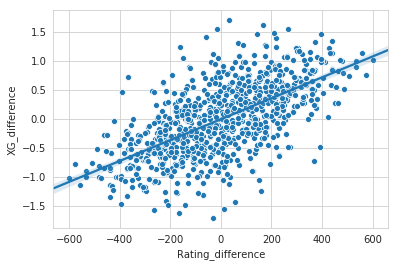

In [5]:
df_features_xg_elo = feature_engineering(df_elo,df_results)

with sns.axes_style("whitegrid"):
    ax = sns.scatterplot(data=df_features_xg_elo,x='Rating_difference',y='XG_difference')

    scatterplot=sns.regplot(data=df_features_xg_elo,x='Rating_difference',y='XG_difference', scatter=False, ax=ax)
    fig = scatterplot.get_figure() 
    #fig.savefig("XG_diff_vs_rating_diff.png") 

In [67]:
df_features_xg_elo.loc[(df_features_xg_elo['Team_A']=='Qatar')&(df_features_xg_elo['Team_B']=='Ecuador'),'Rating_difference'].values

array([-153], dtype=int64)

In [58]:
np.unique(df_features_xg_elo.loc[df_features_xg_elo['Team_A']=='Ecuador',["score_A"]].values)

array([1.28])

In [72]:
#Model regression lineaire 500 elo diff = 1.8 XG difference 
#Train model
from sklearn import linear_model
reg = linear_model.LinearRegression()
df_reg= df_features_xg_elo.dropna(subset= ['XG_difference'], axis=0)
X, y = np.array(df_reg['Rating_difference']).reshape(-1, 1),np.array(df_reg['XG_difference'])    
reg.fit(X,y)
pente = [reg.coef_,reg.intercept_]
print(pente)

##-> pente plus basse ?
#utiliser elo ratings pour dire si une team a sur ou sous performé à chaque match précédent

#ajouter XG = nb buts moyens avec elo difference
XG_Qatar = np.unique(df_features_xg_elo.loc[df_features_xg_elo['Team_A']=='Qatar',["score_A"]].values)
XG_Equator = np.unique(df_features_xg_elo.loc[df_features_xg_elo['Team_A']=='Ecuador',["score_A"]].values)
print(XG_Qatar , XG_Equator)

elo_difference =df_features_xg_elo.loc[(df_features_xg_elo['Team_A']=='Qatar')&(df_features_xg_elo['Team_B']=='Ecuador'),'Rating_difference'].values
XG_difference = pente[0]*(elo_difference  )*2  +pente[1]
print(XG_difference)
print('nouveau XG_Qatar:', XG_Qatar +XG_difference/2 )
print('nouveau XG_Ecuador:', XG_Equator -XG_difference/2 )

[array([0.00180079]), 1.5280488941077423e-17]
[1.71014493] [1.28]
[-0.55104023]
nouveau XG_Qatar: [1.43462481]
nouveau XG_Ecuador: [1.55552012]


In [7]:
XG_difference/2

array([-0.27552012])

In [8]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()

clf.fit(X, y)

clf.predict(elo_difference.reshape(-1,1) )

array([-0.27525161])

In [78]:
clf.predict(elo_difference.reshape(-1,1) )

array([-0.27525161])

In [9]:
df_features_xg_elo.loc[(df_features_xg_elo['Team_A']=='Qatar'),['XG_difference','Rating_difference']].std()

XG_difference          0.440628
Rating_difference    150.297032
dtype: float64

In [14]:
##Std for general teams
X =np.array(df_reg['Rating_difference']).reshape(-1, 1)
preds = clf.predict( X)
true_values =np.array( df_reg['XG_difference']).reshape(-1, 1)

(preds-true_values ).std()

0.7265308722775412

In [18]:
##Std for a specfic teams
X =np.array(df_reg.loc[df_reg['Team_A']=='Qatar','Rating_difference']).reshape(-1, 1)
preds = clf.predict( X)
true_values =np.array( df_reg.loc[df_reg['Team_A']=='Qatar','XG_difference']).reshape(-1, 1)

(preds-true_values ).std()

0.5103005855856901

In [ ]:
df_reg.loc[df_reg['Team_A']=='Qatar']

In [26]:
df_reg.loc[(df_reg['Team_A']=='Qatar')&(df_reg['Rank_Team_B']<=16) ,'XG_difference']

27    -0.271337
58    -0.510194
89    -0.520624
120   -0.847232
151   -0.376062
182   -0.355429
213   -0.222058
244   -0.539855
275    0.248606
306    0.060145
337   -0.547920
368   -0.100200
399   -0.104670
988   -0.517925
Name: XG_difference, dtype: float64

In [27]:
df_reg.loc[(df_reg['Team_A']=='Qatar')&(df_reg['Rank_Team_B']>16) ,'XG_difference']

430    0.430145
461    0.001054
492    0.133222
554   -0.269447
585    0.556299
616   -0.175101
647    0.064984
678   -0.991983
709   -0.073188
740    0.710145
771   -0.238573
802    0.320314
833    0.281573
896    0.479376
927    0.623188
958    0.493929
Name: XG_difference, dtype: float64

In [20]:
##Std for a specfic teams against bigger opponents
X =np.array(df_reg.loc[(df_reg['Team_A']=='Qatar')&(df_reg['Rank_Team_B']<=16) ,'Rating_difference']).reshape(-1, 1)
preds = clf.predict( X)
true_values =np.array( df_reg.loc[(df_reg['Team_A']=='Qatar')&(df_reg['Rank_Team_B']<=16) ,'XG_difference']).reshape(-1, 1)

(preds-true_values ).std()

0.31229196651239577

In [22]:
X =np.array(df_reg.loc[(df_reg['Team_A']=='Qatar')&(df_reg['Rank_Team_B']>16) ,'Rating_difference']).reshape(-1, 1)
preds = clf.predict( X)
true_values =np.array( df_reg.loc[(df_reg['Team_A']=='Qatar')&(df_reg['Rank_Team_B']>16) ,'XG_difference']).reshape(-1, 1)

(preds-true_values ).std()

0.4452371054690803

In [37]:
elo_diff2 = df_reg.loc[(df_reg['Team_A']=='Qatar')
                             &(df_reg['Team_B']=='Ecuador'),'Rating_difference'].values
print(elo_diff2)
print(max(0,elo_diff2[0]))
print(min(0,elo_diff2[0]))
df_reg[(df_reg['Rating_difference']<=max(0,elo_diff2[0]))&(df_reg['Rating_difference']>=min(0,elo_diff2[0]))]

[-153]
0
-153


,Team_A,Team_B,Rank_Team_A,Rating_A,score_A,Rank_Team_B,Rating_B,score_B,XG_difference,Rating_difference
1,Spain,Argentina,3,2048,2.220339,2,2143,1.981481,0.238858,-95
2,Netherlands,Argentina,4,2040,2.230769,2,2143,1.981481,0.249288,-103
3,Belgium,Argentina,5,2007,2.557377,2,2143,1.981481,0.575896,-136
4,Portugal,Argentina,6,2006,2.086207,2,2143,1.981481,0.104725,-137
5,France,Argentina,7,2005,2.065574,2,2143,1.981481,0.084092,-138
...,...,...,...,...,...,...,...,...,...,...
898,Ghana,Saudi Arabia,67,1567,1.216216,55,1635,1.230769,-0.014553,-68
929,Ghana,Cameroon,67,1567,1.216216,60,1610,1.086957,0.129260,-43
961,Argentina,Brazil,2,2143,1.981481,1,2169,2.228070,-0.246589,-26
962,Spain,Brazil,3,2048,2.220339,1,2169,2.228070,-0.007731,-121


In [38]:
elo_diff2 = df_reg.loc[(df_reg['Team_A']=='Brazil')
                             &(df_reg['Team_B']=='Ecuador'),'Rating_difference'].values
print(elo_diff2)
print(max(0,elo_diff2[0]))
print(min(0,elo_diff2[0]))
df_reg[(df_reg['Rating_difference']<=max(0,elo_diff2[0]))&(df_reg['Rating_difference']>=min(0,elo_diff2[0]))]

[336]
336
0


,Team_A,Team_B,Rank_Team_A,Rating_A,score_A,Rank_Team_B,Rating_B,score_B,XG_difference,Rating_difference
0,Brazil,Argentina,1,2169,2.228070,2,2143,1.981481,0.246589,26
31,Brazil,Spain,1,2169,2.228070,3,2048,2.220339,0.007731,121
32,Argentina,Spain,2,2143,1.981481,3,2048,2.220339,-0.238858,95
62,Brazil,Netherlands,1,2169,2.228070,4,2040,2.230769,-0.002699,129
63,Argentina,Netherlands,2,2143,1.981481,4,2040,2.230769,-0.249288,103
...,...,...,...,...,...,...,...,...,...,...
956,Tunisia,Ghana,40,1707,1.389831,67,1567,1.216216,0.173614,140
957,Senegal,Ghana,44,1687,1.428571,67,1567,1.216216,0.212355,120
958,Qatar,Ghana,46,1680,1.710145,67,1567,1.216216,0.493929,113
959,Saudi Arabia,Ghana,55,1635,1.230769,67,1567,1.216216,0.014553,68


In [40]:
from scipy import stats


x  = df_reg.loc[(df_reg['Rating_difference']<=max(0,elo_diff2[0]))&(df_reg['Rating_difference']>=min(0,elo_diff2[0])),'XG_difference']
k2, p = stats.normaltest(x)

alpha = 1e-3

print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")

p = 0.0145795
The null hypothesis cannot be rejected


In [45]:
rng = np.random.default_rng()
x = rng.normal(0, 1, size=1000)
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")

p = 0.371614
The null hypothesis cannot be rejected


In [41]:
from scipy import stats
elo_diff2 = df_reg.loc[(df_reg['Team_A']=='Qatar')
                             &(df_reg['Team_B']=='Ecuador'),'Rating_difference'].values
x  = df_reg.loc[(df_reg['Rating_difference']<=max(0,elo_diff2[0]))&(df_reg['Rating_difference']>=min(0,elo_diff2[0])),'XG_difference']
k2, p = stats.normaltest(x)

alpha = 1e-3

print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")

p = 0.124378
The null hypothesis cannot be rejected


In [48]:
df_reg.loc[(df_reg['Rating_difference']<=max(0,elo_diff2[0]))&
           (df_reg['Rating_difference']>=min(0,elo_diff2[0])),'XG_difference'].std()


0.5095278903370672

In [52]:
df_reg.loc[df_reg['Team_A']=='Qatar','score_A'].mode()[0]

1.710144927536232

In [ ]:
#Next sep : simuler match, tournois avec classes$
#faire figures histogrammes
#figure home away teams
#resultat recents + de poids : recalculer XG en donnant des poids + iomportant resultat recent
#difference en XG with normal distributed noise
#Normal distribution around this line : http://madrury.github.io/jekyll/update/statistics/2017/08/12/noisy-regression.html
#trouver un  moyen de calculer variance (std) de l'echantillon (+ajouter classes big/low teams)
#std predicted vs true ? 

In [76]:
elo_diff = df_reg.loc[(df_reg['Team_A']=='Qatar')
                             &(df_reg['Team_B']=='Ecuador'),'Rating_difference'].values

x =df_reg.loc[(df_reg['Rating_difference']<=max(0,elo_diff2[0]))&(df_reg['Rating_difference']>=min(0,elo_diff2[0])),'XG_difference']

x.mean(), x.std()

(-0.1142879198305134, 0.5095278903370672)

In [89]:
elo_diff = df_reg.loc[(df_reg['Team_A']=='Qatar')
                             &(df_reg['Team_B']=='Ecuador'),'Rating_difference'].values

x =df_reg.loc[(df_reg['Rating_difference']<=max(0.75*elo_diff2[0],1.25*elo_diff2[0]))&(df_reg['Rating_difference']>=min(0.75*elo_diff2[0],1.25*elo_diff2[0])),:]

x['XG_difference'].mean(), x['XG_difference'].std()


(-0.21840766187055852, 0.5212225948712856)

In [96]:
elo_diff = df_reg.loc[(df_reg['Team_A']=='Qatar')
                             &(df_reg['Team_B']=='Ecuador'),'Rating_difference'].values

x =df_reg.loc[(df_reg['Rating_difference']<=max(0.75*elo_diff2[0],1.5*elo_diff2[0]))&(df_reg['Rating_difference']>=min(0.5*elo_diff2[0],1.5*elo_diff2[0])),:]

x['XG_difference'].mean(), x['XG_difference'].std()


(-0.287978284791022, 0.5099306049832423)

In [95]:
x  = df_reg.loc[(df_reg['Rating_difference']<=max(0.75*elo_diff2[0],1.25*elo_diff2[0]))&(df_reg['Rating_difference']>=min(0.75*elo_diff2[0],1.25*elo_diff2[0])),'XG_difference']
print(len(x))
k2, p = stats.normaltest(x)

alpha = 0.01

print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution

    print("The null hypothesis can be rejected")

else:

    print("The null hypothesis cannot be rejected")

97
p = 0.563309
The null hypothesis cannot be rejected


In [85]:
max(0.75*elo_diff2[0] ,1.25*elo_diff2[0])

-114.75

In [86]:
min(0.75*elo_diff2[0] ,1.25*elo_diff2[0])

-191.25

In [9]:
#rajouter model en argument ?
def simule_match(dataframe,equipe1='Qatar',equipe2='Ecuador',N_simul=10000):
    #Find ELo difference :
    elo_diff = dataframe.loc[(dataframe['Team_A']==equipe1)
                             &(dataframe['Team_B']==equipe2),'Rating_difference'].values
    #Predict XG_difference :
    #mean = model.predict(elo_diff.reshape(-1, 1) 
    #changer interval autour duquel on sample XG_difference
    sample = dataframe.loc[(dataframe['Rating_difference']<=max(elo_diff[0]*1.25,elo_diff[0]*0.75))&
                      ( dataframe['Rating_difference']>=min(elo_diff[0]*1.25,elo_diff[0]*0.75)),'XG_difference']
    mean = sample.mean()
    variance  =sample.std()
   # print(mean,variance)
    #do multiple sampling?
    XG_difference = np.random.normal(loc=mean, scale=variance)
    #print(XG_difference)
    #changing Xg_difference by  weighting more recent matchs and select only ranking teams accordingly_adversaries
    new_XG_team_A, new_XG_team_B = dataframe.loc[dataframe['Team_A']==equipe1,'score_A'].mode()[0]+XG_difference/2,dataframe.loc[dataframe['Team_A']==equipe2,'score_A'].mode()[0]-XG_difference/2
    #print(new_XG_team_A, new_XG_team_B )
    #Simulate 100000 matchs :
    simul_results =[[np.random.poisson(new_XG_team_A), np.random.poisson(new_XG_team_B)]for i in range(N_simul)]

    print(f"l'equipe {equipe1} a {100*np.mean([ score[0]>score[1] for score in simul_results])} % de chance de l'emporter" )
    print(f"l'equipe {equipe2} a {100*np.mean([ score[0]<score[1] for score in simul_results])} % de chance de l'emporter" )
    print(f" {100*np.mean([ score[0]==score[1] for score in simul_results])} % de chance de match nul entre l'equipe {equipe1} et l'equipe {equipe2}" )  
    print(f"score_moyen : {equipe1} {np.mean([ score[0] for score in simul_results])} - {equipe2} {np.mean([ score[1] for score in simul_results])} ")
    return(simul_results)

In [104]:
ouverture =simule_match(df_reg)

l'equipe Qatar a 31.34 % de chance de l'emporter
l'equipe Ecuador a 44.2 % de chance de l'emporter
 24.46 % de chance de match nul entre l'equipe Qatar et l'equipe Ecuador


In [242]:
huitiemes = simule_match(df_reg,'England','Senegal')

l'equipe England a 57.60999999999999 % de chance de l'emporter
l'equipe Senegal a 23.29 % de chance de l'emporter
 19.1 % de chance de match nul entre l'equipe England et l'equipe Senegal
score_moyen : England 2.2786 - Senegal 1.3883 


In [243]:
huitiemes = simule_match(df_reg,'Senegal','England')

l'equipe Senegal a 20.01 % de chance de l'emporter
l'equipe England a 61.19 % de chance de l'emporter
 18.8 % de chance de match nul entre l'equipe Senegal et l'equipe England
score_moyen : Senegal 1.3151 - England 2.3951 


In [239]:
huitiemes = simule_match(df_reg,'France','Poland')

l'equipe France a 48.02 % de chance de l'emporter
l'equipe Poland a 30.91 % de chance de l'emporter
 21.07 % de chance de match nul entre l'equipe France et l'equipe Poland
score_moyen : France 2.1064 - Poland 1.6705 


In [241]:
huitiemes = simule_match(df_reg,'Poland','France')

l'equipe Poland a 29.7 % de chance de l'emporter
l'equipe France a 50.29 % de chance de l'emporter
 20.01 % de chance de match nul entre l'equipe Poland et l'equipe France
score_moyen : Poland 1.6364 - France 2.1523 


In [10]:
simule_match(df_new,'Japan','Croatia')

l'equipe Japan a 27.33 % de chance de l'emporter
l'equipe Croatia a 51.29 % de chance de l'emporter
 21.38 % de chance de match nul entre l'equipe Japan et l'equipe Croatia
score_moyen : Japan 1.476 - Croatia 2.064 


[[0, 2],
 [0, 1],
 [0, 1],
 [2, 0],
 [0, 1],
 [2, 2],
 [1, 0],
 [0, 5],
 [0, 1],
 [3, 4],
 [2, 2],
 [0, 0],
 [2, 3],
 [1, 1],
 [0, 3],
 [4, 3],
 [5, 0],
 [1, 0],
 [1, 3],
 [4, 1],
 [3, 0],
 [0, 4],
 [2, 2],
 [1, 1],
 [0, 3],
 [3, 4],
 [0, 1],
 [2, 1],
 [1, 3],
 [2, 3],
 [1, 3],
 [1, 0],
 [1, 0],
 [0, 0],
 [3, 1],
 [3, 0],
 [3, 1],
 [0, 2],
 [2, 0],
 [3, 1],
 [3, 3],
 [0, 2],
 [2, 5],
 [5, 5],
 [1, 1],
 [3, 1],
 [1, 5],
 [1, 1],
 [3, 2],
 [4, 3],
 [2, 2],
 [2, 2],
 [1, 0],
 [0, 1],
 [0, 3],
 [0, 0],
 [3, 3],
 [1, 3],
 [1, 2],
 [2, 6],
 [1, 1],
 [3, 2],
 [0, 0],
 [3, 0],
 [1, 2],
 [1, 1],
 [1, 3],
 [1, 2],
 [1, 1],
 [0, 3],
 [2, 4],
 [1, 1],
 [1, 1],
 [2, 3],
 [2, 3],
 [0, 5],
 [1, 2],
 [1, 3],
 [5, 3],
 [1, 4],
 [0, 1],
 [2, 4],
 [0, 3],
 [1, 5],
 [0, 1],
 [0, 4],
 [2, 3],
 [1, 2],
 [3, 1],
 [6, 2],
 [1, 1],
 [1, 1],
 [1, 4],
 [2, 1],
 [2, 3],
 [1, 3],
 [1, 0],
 [2, 1],
 [0, 0],
 [3, 2],
 [1, 5],
 [2, 2],
 [1, 5],
 [1, 1],
 [1, 2],
 [1, 3],
 [4, 4],
 [2, 2],
 [2, 1],
 [0, 3],
 [0, 2],
 

In [11]:
simule_match(df_new,'Croatia','Japan')

l'equipe Croatia a 48.15 % de chance de l'emporter
l'equipe Japan a 30.159999999999997 % de chance de l'emporter
 21.69 % de chance de match nul entre l'equipe Croatia et l'equipe Japan
score_moyen : Croatia 1.9733 - Japan 1.5369 


[[5, 1],
 [0, 0],
 [0, 2],
 [2, 1],
 [3, 1],
 [1, 3],
 [2, 0],
 [3, 0],
 [0, 2],
 [1, 1],
 [1, 2],
 [0, 0],
 [2, 3],
 [2, 6],
 [1, 4],
 [4, 3],
 [3, 2],
 [3, 1],
 [0, 4],
 [3, 0],
 [2, 1],
 [3, 1],
 [2, 3],
 [3, 1],
 [2, 0],
 [2, 3],
 [2, 0],
 [4, 3],
 [3, 1],
 [2, 1],
 [0, 4],
 [3, 1],
 [1, 1],
 [2, 0],
 [4, 1],
 [2, 1],
 [3, 1],
 [4, 3],
 [4, 1],
 [2, 0],
 [1, 4],
 [2, 3],
 [1, 2],
 [5, 1],
 [3, 1],
 [1, 0],
 [2, 1],
 [1, 3],
 [2, 2],
 [2, 1],
 [3, 2],
 [0, 1],
 [2, 4],
 [2, 3],
 [3, 1],
 [0, 1],
 [2, 1],
 [1, 0],
 [4, 0],
 [2, 2],
 [4, 3],
 [4, 2],
 [2, 1],
 [2, 2],
 [2, 0],
 [1, 1],
 [0, 0],
 [3, 5],
 [2, 1],
 [0, 0],
 [0, 1],
 [2, 1],
 [1, 1],
 [1, 1],
 [0, 2],
 [1, 1],
 [1, 1],
 [0, 2],
 [2, 1],
 [2, 1],
 [1, 0],
 [3, 0],
 [2, 0],
 [2, 1],
 [1, 1],
 [3, 1],
 [0, 1],
 [3, 2],
 [3, 1],
 [4, 2],
 [2, 0],
 [1, 5],
 [3, 1],
 [4, 0],
 [3, 3],
 [1, 1],
 [0, 4],
 [2, 2],
 [3, 0],
 [1, 0],
 [3, 2],
 [5, 0],
 [1, 0],
 [0, 1],
 [3, 2],
 [2, 1],
 [0, 1],
 [6, 2],
 [4, 1],
 [1, 3],
 [3, 4],
 

In [12]:
simule_match(df_new,'South Korea','Brazil')

l'equipe South Korea a 14.14 % de chance de l'emporter
l'equipe Brazil a 69.64 % de chance de l'emporter
 16.220000000000002 % de chance de match nul entre l'equipe South Korea et l'equipe Brazil
score_moyen : South Korea 1.1684 - Brazil 2.7092 


[[0, 4],
 [3, 4],
 [0, 1],
 [0, 3],
 [0, 2],
 [1, 3],
 [4, 4],
 [0, 0],
 [2, 1],
 [0, 2],
 [3, 5],
 [2, 3],
 [1, 2],
 [0, 2],
 [3, 2],
 [1, 3],
 [0, 2],
 [2, 3],
 [2, 1],
 [0, 4],
 [1, 5],
 [2, 0],
 [0, 1],
 [2, 0],
 [0, 2],
 [4, 0],
 [1, 1],
 [0, 1],
 [3, 5],
 [2, 1],
 [1, 1],
 [1, 5],
 [0, 3],
 [0, 3],
 [0, 5],
 [1, 1],
 [1, 1],
 [2, 2],
 [1, 6],
 [1, 1],
 [2, 1],
 [1, 3],
 [1, 4],
 [1, 1],
 [1, 2],
 [2, 4],
 [2, 1],
 [1, 2],
 [0, 0],
 [1, 4],
 [0, 3],
 [2, 5],
 [0, 4],
 [0, 2],
 [1, 3],
 [0, 3],
 [3, 2],
 [4, 3],
 [1, 2],
 [0, 2],
 [2, 2],
 [1, 6],
 [3, 0],
 [1, 1],
 [0, 3],
 [1, 5],
 [0, 4],
 [2, 2],
 [2, 2],
 [0, 2],
 [1, 4],
 [3, 1],
 [1, 7],
 [0, 1],
 [2, 2],
 [1, 3],
 [2, 3],
 [1, 2],
 [3, 3],
 [1, 2],
 [1, 1],
 [1, 0],
 [0, 2],
 [3, 5],
 [3, 4],
 [0, 4],
 [3, 3],
 [2, 3],
 [1, 2],
 [0, 2],
 [3, 0],
 [2, 2],
 [0, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [2, 4],
 [3, 0],
 [2, 2],
 [1, 4],
 [0, 2],
 [0, 4],
 [1, 1],
 [0, 2],
 [1, 3],
 [3, 4],
 [2, 2],
 [1, 5],
 [1, 2],
 [1, 5],
 [3, 1],
 

In [5]:
def scrapping_elo_ratings(url="http://www.eloratings.net/2022_World_Cup_start.tsv?_=1669842790390",url_team="https://www.eloratings.net/en.teams.tsv?_=1670158726698"):
    request =pd.read_csv(url,sep='\t',header=None)
    
    request_teams = requests.get(url_team)
    f = StringIO(request_teams.text)
    reader = csv.reader(f, delimiter='\\')
    l_teams =[]
    for row in reader:
        l_teams.append(row[0].split('\t',1))

    df_teams = pd.DataFrame(l_teams,columns=['Team','Team_Name'])
    

    columns_names =['Rank_Global' ,'Rank_Team','Team','Rating', 'Average_Rank','Average_Rating', '1 Year Change Rank','1 Year Change Rating',
    'Total','Home','Away','Neutral','Wins','Losses','Draws','Goals_For','Goals_Against']

    df_elo = pd.DataFrame(data =request .loc[:,[0,1,2,3,6,7,14,8]+[22+i for i in range(9)]] )
    df_elo.columns = columns_names
    df_elo = df_elo.merge(df_teams,how='left',on='Team')
    df_elo=df_elo.reindex(columns=list(df_elo.columns[0:3])+[df_elo.columns[-1]]+list(df_elo.columns[3:-1]))
    return(df_elo)

In [249]:
scrapping_elo_ratings("https://www.eloratings.net/World.tsv?_=1670158726700","https://www.eloratings.net/en.teams.tsv?_=1670158726698")

,Rank_Global,Rank_Team,Team,Team_Name,Rating,Average_Rank,Average_Rating,1 Year Change Rank,1 Year Change Rating,Total,Home,Away,Neutral,Wins,Losses,Draws,Goals_For,Goals_Against
0,1,1,BR,Brazil,2137,4,1999,0,20,1029,364,331,334,656,162,211,2233,913
1,2,2,AR,Argentina,2125,5,1984,+1,26,1065,368,405,292,576,226,263,2008,1110
2,3,3,NL,Netherlands,2068,15,1844,+9,54,857,405,346,106,441,230,186,1782,1092
3,4,4,ES,Spain,2007,7,1941,+1,19,740,324,290,126,432,136,172,1487,665
4,5,5,FR,France,1993,16,1784,−3,41,893,455,330,108,443,263,187,1595,1242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,235,235,TO,Tonga,528,210,662,0,235,62,8,14,40,14,42,6,70,242
235,236,236,NU,Niue,496,222,496,0,236,2,0,0,2,0,2,0,0,33
236,237,237,AS,Eastern Samoa\tEast Samoa,472,222,473,0,239,51,0,13,38,4,45,2,30,340
237,238,238,MP,Northern Mariana Islands\tNorthern Marianas\tN...,404,229,524,0,239,28,3,11,14,3,23,2,33,121


In [264]:
df_elo

,Rank_Global,Rank_Team,Team,Team_Name,Rating,Average_Rank,Average_Rating,1 Year Change Rank,1 Year Change Rating,Total,Home,Away,Neutral,Wins,Losses,Draws,Goals_For,Goals_Against
0,1,1,BR,Brazil,2169,4,1999,0,20,1026,364,331,331,654,161,211,2230,912
1,2,2,AR,Argentina,2143,5,1984,+1,26,1061,368,405,288,573,225,263,2001,1107
2,3,3,ES,Spain,2048,7,1941,+2,19,737,324,290,123,431,135,171,1478,662
3,4,4,NL,Netherlands,2040,15,1844,+8,54,853,405,345,103,438,230,185,1774,1090
4,5,5,BE,Belgium,2007,23,1751,−1,71,834,401,358,75,369,294,171,1515,1323
5,6,6,PT,Portugal,2006,19,1789,+2,41,651,304,246,101,317,182,152,1112,742
6,7,7,FR,France,2005,16,1784,−5,41,890,455,330,105,441,262,187,1589,1239
7,8,9,DK,Denmark,1971,20,1798,+1,61,864,393,383,88,401,288,175,1590,1177
8,9,10,DE,Germany,1963,8,1910,−1,24,1003,444,403,156,581,213,209,2259,1179
9,10,11,UY,Uruguay,1936,12,1878,+6,44,971,321,413,237,428,309,234,1544,1202


In [8]:
df_new = feature_engineering(scrapping_elo_ratings("https://www.eloratings.net/World.tsv?_=1670158726700","https://www.eloratings.net/en.teams.tsv?_=1670158726698"),
                                         pd.read_csv("results_new.csv"))

df_new= df_new.dropna(subset= ['XG_difference'], axis=0)
print(df_new['Team_A'].unique())
df_new =df_new.merge(df_elo['Team_Name'],how='inner',left_on=['Team_A'],right_on=['Team_Name'])
df_new =df_new.merge(df_elo['Team_Name'],how='inner',left_on=['Team_B'],right_on=['Team_Name'])
df_new

['Brazil' 'Netherlands' 'France' 'Spain' 'England' 'Portugal' 'Italy'
 'Germany' 'Belgium' 'Croatia' 'Switzerland' 'Colombia' 'Uruguay'
 'Denmark' 'Morocco' 'Peru' 'Ecuador' 'Japan' 'Serbia' 'Hungary' 'Ukraine'
 'Mexico' 'Poland' 'South Korea' 'Iran' 'Australia' 'Sweden' 'Norway'
 'Russia' 'Scotland' 'Austria' 'Tunisia' 'Senegal' 'Costa Rica' 'Paraguay'
 'Wales' 'Turkey' 'Canada' 'Algeria' 'Chile' 'Greece' 'Finland'
 'Venezuela' 'Cameroon' 'Ivory Coast' 'Slovenia' 'Egypt' 'Georgia'
 'Panama' 'Saudi Arabia' 'Nigeria' 'Mali' 'Israel' 'Bolivia' 'Romania'
 'Burkina Faso' 'Ghana' 'Jordan' 'Slovakia' 'Qatar' 'Uzbekistan' 'Iraq'
 'Jamaica' 'Oman' 'South Africa' 'Iceland' 'Albania' 'Montenegro' 'Haiti'
 'New Zealand' 'Bulgaria' 'Kosovo' 'Bahrain' 'Gabon' 'Cape Verde'
 'El Salvador' 'Honduras' 'Zambia' 'Armenia' 'Guatemala' 'Luxembourg'
 'Palestine' 'Estonia' 'Syria' 'Gambia' 'Azerbaijan' 'Belarus' 'Angola'
 'Uganda' 'Benin' 'Mauritania' 'Kazakhstan' 'Vietnam' 'Thailand'
 'Martinique' 'Guinea' 

,Team_A,Team_B,Rank_Team_A,Rating_A,score_A,Rank_Team_B,Rating_B,score_B,XG_difference,Rating_difference,Team_Name_x,Team_Name_y
0,Brazil,Argentina,1,2137,2.228070,2,2125,1.981481,0.246589,12,Brazil,Argentina
1,Netherlands,Argentina,3,2068,2.230769,2,2125,1.981481,0.249288,-57,Netherlands,Argentina
2,France,Argentina,4,2018,2.065574,2,2125,1.981481,0.084092,-107,France,Argentina
3,Spain,Argentina,5,2007,2.220339,2,2125,1.981481,0.238858,-118,Spain,Argentina
4,England,Argentina,6,1995,2.258065,2,2125,1.981481,0.276583,-130,England,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...
925,Cameroon,Brazil,47,1679,1.086957,1,2137,2.228070,-1.141114,-458,Cameroon,Brazil
926,Saudi Arabia,Brazil,54,1643,1.230769,1,2137,2.228070,-0.997301,-494,Saudi Arabia,Brazil
927,Ghana,Brazil,62,1596,1.216216,1,2137,2.228070,-1.011854,-541,Ghana,Brazil
928,Qatar,Brazil,65,1578,1.710145,1,2137,2.228070,-0.517925,-559,Qatar,Brazil


In [290]:
df_elo['Team_Name'].unique()

array(['Brazil', 'Argentina', 'Spain', 'Netherlands', 'Belgium',
       'Portugal', 'France', 'Denmark', 'Germany', 'Uruguay', 'Croatia',
       'England', 'Switzerland', 'Serbia', 'Ecuador', 'Poland', 'Mexico',
       'United States\tUSA', 'Iran', 'Wales', 'Japan', 'South Korea',
       'Canada', 'Morocco', 'Costa Rica', 'Australia', 'Tunisia',
       'Senegal', 'Qatar', 'Saudi Arabia', 'Cameroon', 'Ghana'],
      dtype=object)

In [287]:
df_new['Team_A'].unique()

array(['Brazil', 'Netherlands', 'Spain', 'France', 'Portugal', 'England',
       'Germany', 'Belgium', 'Croatia', 'Switzerland', 'Uruguay',
       'Denmark', 'Morocco', 'Ecuador', 'Japan', 'Serbia', 'Poland',
       'Mexico', 'South Korea', 'Iran', 'Senegal', 'Australia', 'Tunisia',
       'Costa Rica', 'Wales', 'Canada', 'Cameroon', 'Saudi Arabia',
       'Ghana', 'Qatar', 'Argentina'], dtype=object)

In [288]:
df_new['Team_B'].unique()

array(['Argentina', 'Netherlands', 'Spain', 'France', 'Portugal',
       'England', 'Germany', 'Belgium', 'Croatia', 'Switzerland',
       'Uruguay', 'Denmark', 'Morocco', 'Ecuador', 'Japan', 'Serbia',
       'Poland', 'Mexico', 'South Korea', 'Iran', 'Senegal', 'Australia',
       'Tunisia', 'Costa Rica', 'Wales', 'Canada', 'Cameroon',
       'Saudi Arabia', 'Ghana', 'Qatar', 'Brazil'], dtype=object)

In [277]:
huitiemes = simule_match(df_new,'England','Senegal')


l'equipe England a 61.199999999999996 % de chance de l'emporter
l'equipe Senegal a 19.759999999999998 % de chance de l'emporter
 19.040000000000003 % de chance de match nul entre l'equipe England et l'equipe Senegal
score_moyen : England 2.395 - Senegal 1.3099 


In [278]:
huitiemes = simule_match(df_new,'Senegal','England')

l'equipe Senegal a 21.37 % de chance de l'emporter
l'equipe England a 59.36 % de chance de l'emporter
 19.27 % de chance de match nul entre l'equipe Senegal et l'equipe England
score_moyen : Senegal 1.3843 - England 2.3556 


In [285]:
huitiemes = simule_match(df_reg,'France','Poland')

l'equipe France a 49.51 % de chance de l'emporter
l'equipe Poland a 29.720000000000002 % de chance de l'emporter
 20.77 % de chance de match nul entre l'equipe France et l'equipe Poland
score_moyen : France 2.1539 - Poland 1.6366 


In [280]:
huitiemes = simule_match(df_reg,'Poland','France')

l'equipe Poland a 20.84 % de chance de l'emporter
l'equipe France a 59.93000000000001 % de chance de l'emporter
 19.23 % de chance de match nul entre l'equipe Poland et l'equipe France
score_moyen : Poland 1.3685 - France 2.391 


In [286]:
simule_match(df_reg,'Argentina','Australia')

l'equipe Argentina a 62.13999999999999 % de chance de l'emporter
l'equipe Australia a 20.200000000000003 % de chance de l'emporter
 17.66 % de chance de match nul entre l'equipe Argentina et l'equipe Australia
score_moyen : Argentina 2.529 - Australia 1.4039 


[[2, 2],
 [3, 0],
 [1, 1],
 [7, 3],
 [2, 4],
 [2, 2],
 [2, 0],
 [1, 1],
 [2, 1],
 [2, 3],
 [3, 1],
 [2, 2],
 [2, 1],
 [4, 2],
 [2, 1],
 [1, 2],
 [5, 4],
 [4, 2],
 [3, 4],
 [1, 4],
 [5, 1],
 [4, 1],
 [1, 2],
 [3, 2],
 [0, 1],
 [1, 2],
 [3, 1],
 [2, 1],
 [1, 2],
 [2, 2],
 [6, 1],
 [2, 2],
 [2, 4],
 [4, 1],
 [2, 0],
 [2, 2],
 [4, 2],
 [1, 3],
 [6, 1],
 [5, 0],
 [2, 4],
 [3, 0],
 [4, 1],
 [8, 0],
 [2, 3],
 [0, 0],
 [3, 2],
 [2, 2],
 [4, 0],
 [4, 2],
 [4, 3],
 [2, 1],
 [3, 0],
 [1, 2],
 [2, 2],
 [2, 2],
 [2, 4],
 [2, 3],
 [2, 2],
 [0, 2],
 [3, 1],
 [2, 0],
 [2, 1],
 [3, 1],
 [4, 2],
 [4, 0],
 [1, 0],
 [1, 1],
 [1, 1],
 [2, 1],
 [4, 3],
 [4, 0],
 [3, 0],
 [3, 1],
 [5, 3],
 [5, 3],
 [1, 1],
 [2, 1],
 [3, 3],
 [0, 0],
 [3, 0],
 [4, 1],
 [1, 0],
 [5, 0],
 [0, 3],
 [0, 3],
 [1, 2],
 [1, 1],
 [2, 0],
 [2, 1],
 [3, 1],
 [0, 2],
 [1, 1],
 [5, 1],
 [1, 1],
 [2, 2],
 [1, 3],
 [3, 5],
 [3, 2],
 [1, 1],
 [3, 0],
 [0, 0],
 [1, 3],
 [4, 1],
 [4, 3],
 [3, 4],
 [2, 1],
 [3, 2],
 [0, 2],
 [4, 4],
 [2, 0],
 

In [ ]:
simule_match(df_reg,'Netherlands','Australia')

In [256]:
df_new.head()

,Team_A,Team_B,Rank_Team_A,Rating_A,score_A,Rank_Team_B,Rating_B,score_B,XG_difference,Rating_difference
0,Brazil,Argentina,1,2137,2.228070,2,2125,1.981481,0.246589,12
1,Netherlands,Argentina,3,2068,2.230769,2,2125,1.981481,0.249288,-57
2,Spain,Argentina,4,2007,2.220339,2,2125,1.981481,0.238858,-118
3,France,Argentina,5,1993,2.065574,2,2125,1.981481,0.084092,-132
4,Portugal,Argentina,5,1993,2.086207,2,2125,1.981481,0.104725,-132


In [257]:
df_new

,Team_A,Team_B,Rank_Team_A,Rating_A,score_A,Rank_Team_B,Rating_B,score_B,XG_difference,Rating_difference
0,Brazil,Argentina,1,2137,2.228070,2,2125,1.981481,0.246589,12
1,Netherlands,Argentina,3,2068,2.230769,2,2125,1.981481,0.249288,-57
2,Spain,Argentina,4,2007,2.220339,2,2125,1.981481,0.238858,-118
3,France,Argentina,5,1993,2.065574,2,2125,1.981481,0.084092,-132
4,Portugal,Argentina,5,1993,2.086207,2,2125,1.981481,0.104725,-132
...,...,...,...,...,...,...,...,...,...,...
35527,Tibet,Brazil,226,630,0.800000,1,2137,2.228070,-1.428070,-1507
35528,Anguilla,Brazil,228,621,0.333333,1,2137,2.228070,-1.894737,-1516
35529,Brunei,Brazil,230,615,1.000000,1,2137,2.228070,-1.228070,-1522
35530,Bhutan,Brazil,233,563,0.222222,1,2137,2.228070,-2.005848,-1574


In [106]:
np.mean(ouverture)

1.49945

In [108]:
np.mean([x[0] for x in ouverture ]),np.mean([x[1] for x in ouverture ])

(1.3518, 1.6471)

In [ ]:
#nex step inclure sample dans boucle for des 10000 matchs
#mettre bornes intervalles en paramètre
#revoir XG data en pondérant résultats récents, pods= nb jours jusqu'à la compétition
# personnaliser XG contre grosses petites equipes classe = rang 
#Faire classes Match, Poule, Tournois et simuler tournoi entier :
##https://github.com/gbarbalinardo/worldcup-simulator/blob/master/montecarlo.py
## faire images comme ici: https://github.com/abhinavr2121/World_Cup_2022/tree/main/images 
##ou videao

In [363]:
def compute_XG_diff_mean_std(dataframe,equipe1,equipe2,bound=0.25):
    elo_diff = dataframe.loc[(dataframe['Team_A']==equipe1)
                             &(dataframe['Team_B']==equipe2),'Rating_difference'].values
    #Predict XG_difference :
    #mean = model.predict(elo_diff.reshape(-1, 1) 
    #changer interval autour duquel on sample XG_difference
    sample = dataframe.loc[(dataframe['Rating_difference']<=max(elo_diff[0]*(1+bound),elo_diff[0]*(1-bound)))&
                      ( dataframe['Rating_difference']>=min(elo_diff[0]*(1+bound),elo_diff[0]*(1-bound))),'XG_difference']
    mean = sample.mean()
    variance  =sample.std()
    return(mean,variance)

In [406]:
#Ajouter champ meilleur joeur, XG_meilleur_joueur et blessure 
#A chaque match on tire au hasard un dé pour savir si reisque de blessure
#si oui on retire les XG joueur au XG_equipe
class Team:
    def __init__(self, team_name,XG ,elo_ranking):
            self.name = team_name
            self.xg = XG
            self.elo_ranking = elo_ranking
            self.results = {"Win":0,"Draw":0,"Loss":0,"Goals":0,"Goals_Against":0,"Points":0}
    def __str__(self):
        return(f"Team {self.name}: \n XG : {self.xg} \n ELO Ranking : {self.elo_ranking} \n Current Results : {self.results}")

#rajouter champa data ou fonction compute ? 
class Match:
    def __init__(self, team_A, team_B,dataframe, is_round_robin):
        self.team_A = team_A
        self.team_B = team_B
        self.diff_xg_mean , self.diff_xg_std= compute_XG_diff_mean_std(dataframe, team_A.name, team_B.name,bound=0.25)
        self.is_round_robin = is_round_robin
        self.winner = None
        #probabilities of W/D/L
        self.results = [0,0,0]
       # self.play_match()

    def simulate_match(self,N_samples):
        #Computing Elo Ranking difference
        #Predict XG_difference :
        #do multiple sampling?
        XG_difference = np.random.normal(loc=self.diff_xg_mean, scale=self.diff_xg_std)
        #print(XG_difference)
        #changing Xg_difference by  weighting more recent matchs and select only ranking teams accordingly_adversaries
        new_XG_team_A, new_XG_team_B =max(0,self.team_A.xg+XG_difference/2),max(0,self.team_B.xg-XG_difference/2)
        
        #Simulate 100000 matchs :
        simul_results =[[np.random.poisson(new_XG_team_A), np.random.poisson(new_XG_team_B)]for i in range(N_samples)]
    
        self.results = [np.mean([ score[0]>score[1] for score in simul_results]), 
                        np.mean([ score[0]==score[1] for score in simul_results]),
                       np.mean([ score[0]<score[1] for score in simul_results]) ]
       # print(   self.results)
        
        if np.argmax(self.results)== 0:
            if self.is_round_robin :
                self.team_A.results["Points"]+=3
                self.team_B.results["Points"]+=0
            self.team_A.results["Win"]+=1
            self.team_B.results['Loss']+=1
            self.winner = self.team_A
            
        elif np.argmax(self.results)== 2:
            if self.is_round_robin :
                self.team_A.results["Points"]+=0
                self.team_B.results["Points"]+=3
            self.team_A.results["Loss"]+=1
            self.team_B.results['Win']+=1
            self.winner = self.team_B
        else :
            if self.is_round_robin :
                self.team_A.results["Points"]+=1
                self.team_B.results["Points"]+=1
            elif not self.is_round_robin :
                ##Penaltuy shoothout 
                self.winner = np.random.choice([self.team_A,self.team_B])
            self.team_A.results["Draw"]+=1
            self.team_B.results['Draw']+=1
            
        #rajouter int?
        self.team_A.results['Goals']=  np.mean([ score[0] for score in simul_results])
        self.team_A.results['Goals_Against']= np.mean([ score[1] for score in simul_results])
        self.team_B.results['Goals']= np.mean([ score[1] for score in simul_results])
        self.team_B.results['Goals_Against']= np.mean([ score[0] for score in simul_results])

    
    def __str__(self):
        return (self.team_A.name + " probability of winning is " +100*self.results[0] +" % \n " +
        "Probability of Draw is"+100*self.results[1]   +"%\n"+
        self.team_B.name + " probabilty of winning is " +100*self.results[2] +" %  ")
        
    
    

In [405]:
compute_XG_diff_mean_std(df_test,'Qatar','Senegal',bound=0.25)

(-0.053284382975286704, 0.5867956495884926)

In [388]:
# The winner of the group stage is obtained from
# 1 - points
# 2 - goal difference
# 3 - goal scored
# (no other factors considered)        
class Group_Stage:

    def __init__(self, teams):
        self.first_qualified = None
        self.second_qualified = None
        self.teams = teams
       # self.reset()
       # self.play_first_stage()
        #inclure champ data ?

    def reset(self):
        for team in self.teams:
            self.results = {"Win":0,"Draw":0,"Loss":0,"Goals":0,"Goals_Against":0,"Points":0}

    def play_group_stage(self,dataframe):
        for i in range(0, len(self.teams)):
            for j in range(i + 1, len(self.teams)):
                #rajouter elo_diff_min et elo_std
                    #Match(self.teams[i], self.teams[j],np.random.normal(0,2),np.random.rand(), True).simulate_match(10000)
                    
                    Match(self.teams[i], self.teams[j],dataframe, True).simulate_match(10000)
        #Sorting the teamns           

        self.teams.sort(key= lambda elem : (elem.results['Points'],elem.results['Goals']-elem.results['Goals_Against'],elem.results['Goals'],
                                            np.random.rand()) ,reverse=True)
        self.first_qualified = self.teams[0]
        self.second_qualified = self.teams[1]
      #  [print(x) for x in self.teams]
#Class Tournament

In [293]:
for team in df_reg['Team_A'].unique():
team, df_reg.loc[df_reg['Team_A']==team,'score_A'].mode()[0],
    df_reg.loc[df_reg['Team_A']==team,'Rating_A'].mode()[0])

Brazil 2.2280701754385963 2169
Spain 2.2203389830508473 2048
Netherlands 2.230769230769231 2040
Belgium 2.557377049180328 2007
Portugal 2.086206896551724 2006
France 2.0655737704918034 2005
Denmark 1.9322033898305084 1971
Germany 2.25 1963
Uruguay 1.4615384615384615 1936
Croatia 1.65 1927
England 2.2580645161290325 1920
Switzerland 1.8103448275862069 1902
Serbia 1.8148148148148149 1898
Ecuador 1.28 1833
Poland 1.709090909090909 1814
Mexico 1.5769230769230769 1809
Iran 1.9795918367346939 1797
Wales 1.1538461538461537 1790
Japan 1.8852459016393444 1787
South Korea 1.6451612903225807 1786
Canada 2.702127659574468 1776
Morocco 1.7833333333333334 1766
Costa Rica 1.0 1743
Australia 1.9487179487179487 1719
Tunisia 1.3898305084745763 1707
Senegal 1.4285714285714286 1687
Qatar 1.710144927536232 1680
Saudi Arabia 1.2307692307692308 1635
Cameroon 1.0869565217391304 1610
Ghana 1.2162162162162162 1567
Argentina 1.9814814814814814 2143


In [297]:
{ team : [df_reg.loc[df_reg['Team_A']==team,'score_A'].mode()[0],
         df_reg.loc[df_reg['Team_A']==team,'Rating_A'].mode()[0]] for team in df_reg['Team_A'].unique()}

{'Brazil': [2.2280701754385963, 2169],
 'Spain': [2.2203389830508473, 2048],
 'Netherlands': [2.230769230769231, 2040],
 'Belgium': [2.557377049180328, 2007],
 'Portugal': [2.086206896551724, 2006],
 'France': [2.0655737704918034, 2005],
 'Denmark': [1.9322033898305084, 1971],
 'Germany': [2.25, 1963],
 'Uruguay': [1.4615384615384615, 1936],
 'Croatia': [1.65, 1927],
 'England': [2.2580645161290325, 1920],
 'Switzerland': [1.8103448275862069, 1902],
 'Serbia': [1.8148148148148149, 1898],
 'Ecuador': [1.28, 1833],
 'Poland': [1.709090909090909, 1814],
 'Mexico': [1.5769230769230769, 1809],
 'Iran': [1.9795918367346939, 1797],
 'Wales': [1.1538461538461537, 1790],
 'Japan': [1.8852459016393444, 1787],
 'South Korea': [1.6451612903225807, 1786],
 'Canada': [2.702127659574468, 1776],
 'Morocco': [1.7833333333333334, 1766],
 'Costa Rica': [1.0, 1743],
 'Australia': [1.9487179487179487, 1719],
 'Tunisia': [1.3898305084745763, 1707],
 'Senegal': [1.4285714285714286, 1687],
 'Qatar': [1.710144

In [308]:
len(df_reg['Team_A'].unique())

31

In [314]:
df_elo[df_elo['Team']=='US'].replace({'United States\tUSA':'United States'})

,Rank_Global,Rank_Team,Team,Team_Name,Rating,Average_Rank,Average_Rating,1 Year Change Rank,1 Year Change Rating,Total,Home,Away,Neutral,Wins,Losses,Draws,Goals_For,Goals_Against
17,18,23,US,United States,1798,41,1639,−9,91,765,437,247,81,338,267,160,1139,1006


In [312]:
len(df_elo['Team'].unique())

32

In [296]:
df_reg.loc[:,['Team_A','score_A','Rating_A']]

,Team_A,score_A,Rating_A
0,Brazil,2.228070,2169
1,Spain,2.220339,2048
2,Netherlands,2.230769,2040
3,Belgium,2.557377,2007
4,Portugal,2.086207,2006
...,...,...,...
987,Senegal,1.428571,1687
988,Qatar,1.710145,1680
989,Saudi Arabia,1.230769,1635
990,Cameroon,1.086957,1610


In [300]:
l = [ (i , i+1) for i in range(5)]
l

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

In [408]:
#Integrer calculmean_std dans match
class Tournament :
    def __init__(self,dataframe,groups_list):
        #dictionary {team_name str : team Team Object}
        self.all_teams = { team : Team(team, dataframe.loc[dataframe['Team_A']==team,'score_A'].mode()[0],
         dataframe.loc[dataframe['Team_A']==team,'Rating_A'].mode()[0] ) for team in dataframe['Team_A'].unique()}
        self.groups = groups_list
        self.data = dataframe
       
                            
    def main(self):
        winners = {}
        for i in range(0, 10000):
            # Play round robin
            Groups =[]
            for group in  self.groups :
                #print(group)
                Group_g = Group_Stage([ self.all_teams[teams_group] for teams_group in group])
                Group_g.reset()
                Group_g.play_group_stage(self.data )  
                Groups.append(Group_g)

            # Play final elimination  phase 
           
            huitiemes = [(Match(Groups[i].first_qualified,Groups[i+1].second_qualified,
                                self.data,
                                False ).winner,
                          Match(Groups[i].second_qualified,Groups[i+1].first_qualified,self.data ,False).winner )
                         for i in range(int(len(self.groups)/2))]

            # Quarters
            print(huitiemes)
            quarters = [Match(quart_finalist[0],quart_finalist[1],self.data,False ).winner for quart_finalist in huitiemes ]

            # Semifinals
            semis = [Match(quarters[i],quarters[i+1] ,self.data,False).winner for i in range(int(len(quarters)/2))]

            # Final
            winner = Match(semis[0] ,semis[1],self.data, False).winner

            if winners.has_key(winner.name):
                winners[winner.name] += 1
            else:
                winners[winner.name] = 1

        for key in sorted(winners, key=winners.get, reverse=True):
            print (key + ": " + str(winners[key]))
        return(winners)


In [409]:
t.main()

[(None, None), (None, None), (None, None), (None, None)]


AttributeError: 'NoneType' object has no attribute 'name'

In [ ]:
#faire une fonction tirage au sort

In [7]:
df_results = pd.read_csv("results.csv")
df_elo = pd.read_csv("elo_ratings_team.csv", sep='\t',index_col=0)
df_elo =df_elo.replace({'United States\tUSA':'United States'})
df_test = feature_engineering(df_elo,df_results)

In [ ]:
df_elo

In [324]:
len(df_test['Team_A'].unique())

32

In [407]:
t = Tournament(df_test,[
              ['Qatar','Netherlands' ,'Senegal','Ecuador'],
              ['England','United States','Iran','Wales'],
              ['Argentina','Poland','Mexico','Saudi Arabia'],
              ['France','Denmark','Tunisia','Australia'],
              ['Spain','Japan','Germany','Costa Rica'],
              ['Belgium','Croatia','Morocco','Canada'],
              ['Brazil','Switzerland','Serbia','Cameroon'],
              ['Portugal','Uruguay','South Korea','Ghana']])

In [370]:
df_test

,Team_A,Team_B,Rank_Team_A,Rating_A,score_A,Rank_Team_B,Rating_B,score_B,XG_difference,Rating_difference
0,Brazil,Argentina,1,2169,2.228070,2,2143,1.981481,0.246589,26
1,Spain,Argentina,3,2048,2.220339,2,2143,1.981481,0.238858,-95
2,Netherlands,Argentina,4,2040,2.230769,2,2143,1.981481,0.249288,-103
3,Belgium,Argentina,5,2007,2.557377,2,2143,1.981481,0.575896,-136
4,Portugal,Argentina,6,2006,2.086207,2,2143,1.981481,0.104725,-137
...,...,...,...,...,...,...,...,...,...,...
987,Senegal,Brazil,44,1687,1.428571,1,2169,2.228070,-0.799499,-482
988,Qatar,Brazil,46,1680,1.710145,1,2169,2.228070,-0.517925,-489
989,Saudi Arabia,Brazil,55,1635,1.230769,1,2169,2.228070,-0.997301,-534
990,Cameroon,Brazil,60,1610,1.086957,1,2169,2.228070,-1.141114,-559


In [185]:
np.round(1.51)

2.0

In [193]:
import operator as op
l_test = [ {"Win":2,"Draw":1,"Loss":0,"Goals":5,"Goals_Against":1,"Points":7},
         {"Win":1,"Draw":1,"Loss":1,"Goals":4,"Goals_Against":3,"Points":4},
         {"Win":2,"Draw":0,"Loss":1,"Goals":5,"Goals_Against":4,"Points":6},
         {"Win":0,"Draw":0,"Loss":3,"Goals":1,"Goals_Against":7,"Points":0}]
#sorted(l_test, key=op.attrgetter('Points', 'difference', 'scored'))
#l_test.sort(key=lambda elem: elem['Points'])
#operator.itemgetter(1,2)

#l_test.sort(key= op.itemgetter('Points','Win','Goals') ,reverse=True)
l_test.sort(key= lambda elem : (elem['Points'],elem['Goals']-elem['Goals_Against'],elem['Goals'], np.random.rand()) ,reverse=True)
l_test

[{'Win': 2, 'Draw': 1, 'Loss': 0, 'Goals': 5, 'Goals_Against': 1, 'Points': 7},
 {'Win': 2, 'Draw': 0, 'Loss': 1, 'Goals': 5, 'Goals_Against': 4, 'Points': 6},
 {'Win': 1, 'Draw': 1, 'Loss': 1, 'Goals': 4, 'Goals_Against': 3, 'Points': 4},
 {'Win': 0, 'Draw': 0, 'Loss': 3, 'Goals': 1, 'Goals_Against': 7, 'Points': 0}]

In [196]:

l_test = [ {"Win":1,"Draw":0,"Loss":2,"Goals":5,"Goals_Against":7,"Points":3},
         {"Win":1,"Draw":1,"Loss":1,"Goals":2,"Goals_Against":2,"Points":4},
         {"Win":2,"Draw":0,"Loss":1,"Goals":6,"Goals_Against":4,"Points":6},
         {"Win":1,"Draw":1,"Loss":1,"Goals":4,"Goals_Against":4,"Points":4}]
#sorted(l_test, key=op.attrgetter('Points', 'difference', 'scored'))
#l_test.sort(key=lambda elem: elem['Points'])
#operator.itemgetter(1,2)

#l_test.sort(key= op.itemgetter('Points','Win','Goals') ,reverse=True)
l_test.sort(key= lambda elem : (elem['Points'],elem['Goals']-elem['Goals_Against'],elem['Goals'], np.random.rand()) ,reverse=True)
l_test

[{'Win': 2, 'Draw': 0, 'Loss': 1, 'Goals': 6, 'Goals_Against': 4, 'Points': 6},
 {'Win': 1, 'Draw': 1, 'Loss': 1, 'Goals': 4, 'Goals_Against': 4, 'Points': 4},
 {'Win': 1, 'Draw': 1, 'Loss': 1, 'Goals': 2, 'Goals_Against': 2, 'Points': 4},
 {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 5, 'Goals_Against': 7, 'Points': 3}]

In [129]:
df_reg.columns

Index(['Team_A', 'Team_B', 'Rank_Team_A', 'Rating_A', 'score_A', 'Rank_Team_B',
       'Rating_B', 'score_B', 'XG_difference', 'Rating_difference'],
      dtype='object')

In [130]:
df_reg.loc[df_reg['Team_A']=='Qatar','Rating_A'].mode()[0]

1680

In [174]:
Qatar = Team('Qatar', df_reg.loc[df_reg['Team_A']=='Qatar','score_A'].mode()[0],df_reg.loc[df_reg['Team_A']=='Qatar','Rating_A'].mode()[0])
Ecuador = Team('Ecuador', df_reg.loc[df_reg['Team_A']=='Ecuador','score_A'].mode()[0],df_reg.loc[df_reg['Team_A']=='Ecuador','Rating_A'].mode()[0])

print(Qatar)
print(Ecuador)

Team Qatar: 
 XG : 1.710144927536232 
 ELO Ranking : 1680 
 Current Results : {'Win': 0, 'Draw': 0, 'Loss': 0, 'Goals': 0, 'Goals_Against': 0, 'Points': 0}
Team Ecuador: 
 XG : 1.28 
 ELO Ranking : 1833 
 Current Results : {'Win': 0, 'Draw': 0, 'Loss': 0, 'Goals': 0, 'Goals_Against': 0, 'Points': 0}


In [175]:
m = Match(Qatar,Ecuador, -0.22, 0.5,1 ).simulate_match(10000)


[0.363, 0.2442, 0.3928]


In [176]:
print(m)
print(Qatar)
print(Ecuador)

None
Team Qatar: 
 XG : 1.710144927536232 
 ELO Ranking : 1680 
 Current Results : {'Win': 0, 'Draw': 0, 'Loss': 1, 'Goals': 1.4742, 'Goals_Against': 1.5366, 'Points': 0}
Team Ecuador: 
 XG : 1.28 
 ELO Ranking : 1833 
 Current Results : {'Win': 1, 'Draw': 0, 'Loss': 0, 'Goals': 1.5366, 'Goals_Against': 1.4742, 'Points': 3}


In [116]:
l = [0.43,0.27,0.3]
l[0]*(l[0]>l[])

0

In [200]:
df_reg.loc[df_reg['Team_A']=='Senegal','score_A']

26     1.428571
57     1.428571
88     1.428571
119    1.428571
150    1.428571
181    1.428571
212    1.428571
243    1.428571
274    1.428571
305    1.428571
336    1.428571
367    1.428571
398    1.428571
429    1.428571
460    1.428571
491    1.428571
553    1.428571
584    1.428571
615    1.428571
646    1.428571
677    1.428571
708    1.428571
739    1.428571
770    1.428571
801    1.428571
864    1.428571
895    1.428571
926    1.428571
957    1.428571
987    1.428571
Name: score_A, dtype: float64

In [214]:
l_test = [Qatar, Ecuador,Netherlands,Senegal]
results_bidon = [{'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 1.5496, 'Goals_Against': 1.5913, 'Points': 3}, {'Win': 3, 'Draw': 0, 'Loss': 0, 'Goals': 2.595, 'Goals_Against': 0.1092, 'Points': 9}, {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 3.0333, 'Goals_Against': 0.6708, 'Points': 3}, {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 0.6708, 'Goals_Against': 3.0333, 'Points': 3}]
[{'Win': 3, 'Draw': 0, 'Loss': 0, 'Goals': 2.595, 'Goals_Against': 0.1092, 'Points': 9}, {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 3.0333, 'Goals_Against': 0.6708, 'Points': 3}, {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 1.5496, 'Goals_Against': 1.5913, 'Points': 3}, {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 0.6708, 'Goals_Against': 3.0333, 'Points': 3}]
for i in range(len(l_test)):
    l_test[i].results = results_bidon[i]
l_test.sort(key= lambda elem : (elem.results['Points'],elem.results['Goals']-elem.results['Goals_Against'],elem.results['Goals'], np.random.rand()) ,reverse=True)    
[print(x) for x in l_test]

Team Ecuador: 
 XG : 1.28 
 ELO Ranking : 1833 
 Current Results : {'Win': 3, 'Draw': 0, 'Loss': 0, 'Goals': 2.595, 'Goals_Against': 0.1092, 'Points': 9}
Team Netherlands: 
 XG : 2.230769230769231 
 ELO Ranking : 2040 
 Current Results : {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 3.0333, 'Goals_Against': 0.6708, 'Points': 3}
Team Qatar: 
 XG : 1.710144927536232 
 ELO Ranking : 1680 
 Current Results : {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 1.5496, 'Goals_Against': 1.5913, 'Points': 3}
Team Netherlands: 
 XG : 1.4285714285714286 
 ELO Ranking : 1687 
 Current Results : {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 0.6708, 'Goals_Against': 3.0333, 'Points': 3}


[None, None, None, None]

In [231]:
Qatar = Team('Qatar', df_reg.loc[df_reg['Team_A']=='Qatar','score_A'].mode()[0],df_reg.loc[df_reg['Team_A']=='Qatar','Rating_A'].mode()[0])
Ecuador = Team('Ecuador', df_reg.loc[df_reg['Team_A']=='Ecuador','score_A'].mode()[0],df_reg.loc[df_reg['Team_A']=='Ecuador','Rating_A'].mode()[0])
Netherlands = Team('Netherlands', df_reg.loc[df_reg['Team_A']=='Netherlands','score_A'].mode()[0],df_reg.loc[df_reg['Team_A']=='Netherlands','Rating_A'].mode()[0])
Senegal = Team('Senegal', df_reg.loc[df_reg['Team_A']=='Senegal','score_A'].mode()[0],df_reg.loc[df_reg['Team_A']=='Senegal','Rating_A'].mode()[0])

Group_A = Group_Stage([Qatar,Ecuador,Netherlands,Senegal])
Group_A.reset()
Group_A.play_group_stage()


[0.2845, 0.24, 0.4755]
[0.045, 0.092, 0.863]
[0.3215, 0.2352, 0.4433]
[0.1495, 0.1791, 0.6714]
[0.1362, 0.2075, 0.6563]
[0.5035, 0.2059, 0.2906]
Team Netherlands: 
 XG : 2.230769230769231 
 ELO Ranking : 2040 
 Current Results : {'Win': 3, 'Draw': 0, 'Loss': 0, 'Goals': 2.1096, 'Goals_Against': 1.5692, 'Points': 9}
Team Senegal: 
 XG : 1.4285714285714286 
 ELO Ranking : 1687 
 Current Results : {'Win': 2, 'Draw': 0, 'Loss': 1, 'Goals': 1.5692, 'Goals_Against': 2.1096, 'Points': 6}
Team Ecuador: 
 XG : 1.28 
 ELO Ranking : 1833 
 Current Results : {'Win': 1, 'Draw': 0, 'Loss': 2, 'Goals': 0.7529, 'Goals_Against': 1.9498, 'Points': 3}
Team Qatar: 
 XG : 1.710144927536232 
 ELO Ranking : 1680 
 Current Results : {'Win': 0, 'Draw': 0, 'Loss': 3, 'Goals': 1.4249, 'Goals_Against': 1.6999, 'Points': 0}
